# **Actividad integradora 2**

* Sebastián De Alejandro Villarreal | A01285448
* Juan Eduardo Cibrián Loera | A01198418

Librerías que se usaran

In [56]:
import matplotlib.pyplot as plt
import math
import networkx as nx
import heapq
import numpy as np

## 1. Leer grafo desde un archivo


### Lecutra de grafos
Función para la lectura de los archivos
Se enviará de regreso:
* Cantidad de nodos
* Cantidad de aristas
* Un diccionario que contenga la información
de los nodos
* Un arreglo de tamaño del nodos y contendra el valor de sus aristas
* El nodo office
* Un diccionario con los nuevos nodos a agregar

In [57]:
# Función para leer el archivo y procesar los datos del grafo
def lectura_grafo(nombre_archivo):
  with open(nombre_archivo, 'r') as archivo:
    lineas = archivo.readlines()

    # Leer la cantidad de nodos y aristas
    nodos_cant, aristas_cant = map(int, lineas[0].strip().split())
    #Se inicializa un diccionario de nodos
    nodos = {}
    #Las aristas de nodo hacia sus nodos vecinos
    aristas = {}
    #Se identifica que nodo es la oficina
    oficina = None
    #Arreglo para guardar los nuevos nodos que se quieran integrar
    nuevos_nodos = []
    #Variable control para identificar en que sección del archivo se encuentra
    seccion_actual = None
    #Se empieza a leer desde la segunda línea del archivo
    for linea in lineas[1:]:
      #Se elimina los espacios vacíos del inicio y del final
      linea = linea.strip()
      #Condiciones para actualizar la variable seccion_actual
      if linea == '[NODES]':
        seccion_actual = 'NODES'
        continue
      elif linea == '[EDGES]':
        seccion_actual = 'EDGES'
        continue
      elif linea == '[OFFICE]':
        seccion_actual = 'OFFICE'
        continue
      elif linea == '[NEW]':
        seccion_actual = 'NEW'
        continue
      #Si la sección es actual es de nodos y mientras que linea no sea null
      if seccion_actual == 'NODES' and linea:
        #Se divide el contenido de la línea entre los espacios vacíos existentes
        partes = linea.split()
        #Se obtiene el id del nodo
        nodo_id = int(partes[0])
        #Sus coordenadas en x y
        x, y = float(partes[1]), float(partes[2])
        #Si es nodo fuente o no
        es_fuente = int(partes[3])
        #Se guarda en el diccionario como clave el id del nodo
        #y cómo valores sus coordendas y si es una nodo fuente o no
        nodos[nodo_id] = ((x, y), es_fuente)
      #Si la sección actual es edges y mientras que la línea no sea nulll
      elif seccion_actual == 'EDGES' and linea:
        #Se divide el contenido de la línea entre los espacios vacíos existentes
        partes = linea.split()
        #Se obtiene el id de los nodos y su capacidad
        nodo1, nodo2, capacidad = int(partes[0]), int(partes[1]), float(partes[2])  # Cambiado a float
        #Luego, condiciones en dado caso que no se encuentran dentro del
        #diccionaron, se ingresen y que inicializacon un arreglo vacío
        if nodo1 not in aristas:
          aristas[nodo1] = []
        #Se agrega en el id del nodo su id y cómo valores una tupla que contiene
        #el id node vecino junto a su capacidad
        aristas[nodo1].append((nodo2, capacidad))
        #Mismo procedimiento para le otro nodo id
        if nodo2 not in aristas:
          aristas[nodo2] = []
        aristas[nodo2].append((nodo1, capacidad))  # Suponiendo grafo no dirigido
      #Si la sección actual es office, se obtiene el nodo id que es la oficina
      elif seccion_actual == 'OFFICE' and linea:
        oficina = int(linea)
      #Si la sección actual es nuevo y la linea no sea null
      elif seccion_actual == 'NEW' and linea:
        #Se elimina los vacios del inicio y final
        partes = linea.split()
        #Se obtienen sus coordenada y su capacidad
        x, y, capacidad = float(partes[0]), float(partes[1]), int(partes[2])
        #Se guarda en el arreglo
        nuevos_nodos.append(((x, y), capacidad))
    #Se regresan, la cantidad de nodos existentes, la cantidad de aristas,
    #la información de cada nodo, y los nodos que son vecinos a otros nodos
    #con su respectiva capacidad. El nodo que es la oficina y los nuevos nodos con
    #su respectiva información
    return nodos_cant, aristas_cant, nodos, aristas, oficina, nuevos_nodos

### Graficar grafos

In [58]:
# Función para graficar el grafo
def graficar_grafo(nodos, aristas, oficina,nombre_archivo,version,opcion):
    plt.figure(figsize=(12, 10))
    # Dibujar aristas y sus capacidades
    for nodo_id, vecinos in aristas.items():
        for vecino_id, capacidad in vecinos:
            x1, y1 = nodos[nodo_id][0]
            x2, y2 = nodos[vecino_id][0]
            # Dibujar la línea de la arista en color verde
            plt.plot([x1, x2], [y1, y2], color='green', linewidth=1.5)
            # Calcular la posición media para colocar el peso de la arista
            x_mid = (x1 + x2) / 2
            y_mid = (y1 + y2) / 2
            plt.text(x_mid, y_mid+40, f'{int(capacidad)}', color='black', fontsize=8)  # Mostrar capacidad con un decimal
    # Dibujar nodos y sus etiquetas
    for nodo_id, (coord, es_fuente) in nodos.items():
        x, y = coord
        color = 'red' if es_fuente == 1 else 'black'
        plt.scatter(x, y, color='blue', s=100)  # Círculo azul sólido
        # Mostrar solo el ID del nodo
        plt.text(x-1, y, f'{nodo_id}', color=color, fontsize=10, ha='right', va='top')
    # Marcar la oficina en un color diferente
    if oficina is not None:
        x, y = nodos[oficina][0]
        plt.scatter(x, y, color='yellow', s=120)  # Círculo más grande para la oficina
        plt.text(x-20, y, 'Office', color='green', fontsize=12, ha='right', va='top')
    # Mostrar localizador de coordenadas
    plt.axis('on')
    if opcion != 0:
        # Guardar el gráfico como PNG
        plt.savefig(f"{nombre_archivo[0:3]}_{version}_Graficar_Grafo.png")
    plt.show()


Función para graficar grafo

In [59]:
# Graficar el grafo de diferentes archivos
def graficar_grafo_desde_archivo(nombre_archivo,version,opcion):
    nodos_cant, aristas_cant, nodos, aristas, oficina, nuevos_nodos = lectura_grafo(nombre_archivo)
      # Identificar las fuentes
    fuentes = [nodo_id for nodo_id, (_, es_fuente) in nodos.items() if es_fuente == 1]
    if opcion != 0:
      "Escribir en el archivo"
      f = open(f"{nombre_archivo[0:3]}_{version}.txt", "a")
      f.write("Parte 1 - Información del grafo\n")
      f.write(f"Cantidad de nodos: {nodos_cant}\n")
      f.write(f"Cantidad de aristas: {aristas_cant}\n")
      f.write(f"Fuentes: {', '.join(map(str, fuentes))}\n")
      f.write(f"Nodo oficina: {oficina}\n\n")
    graficar_grafo(nodos, aristas, oficina,nombre_archivo,version,opcion)

### Archivos

Lectura del archivo PES

Graficando PES.txt


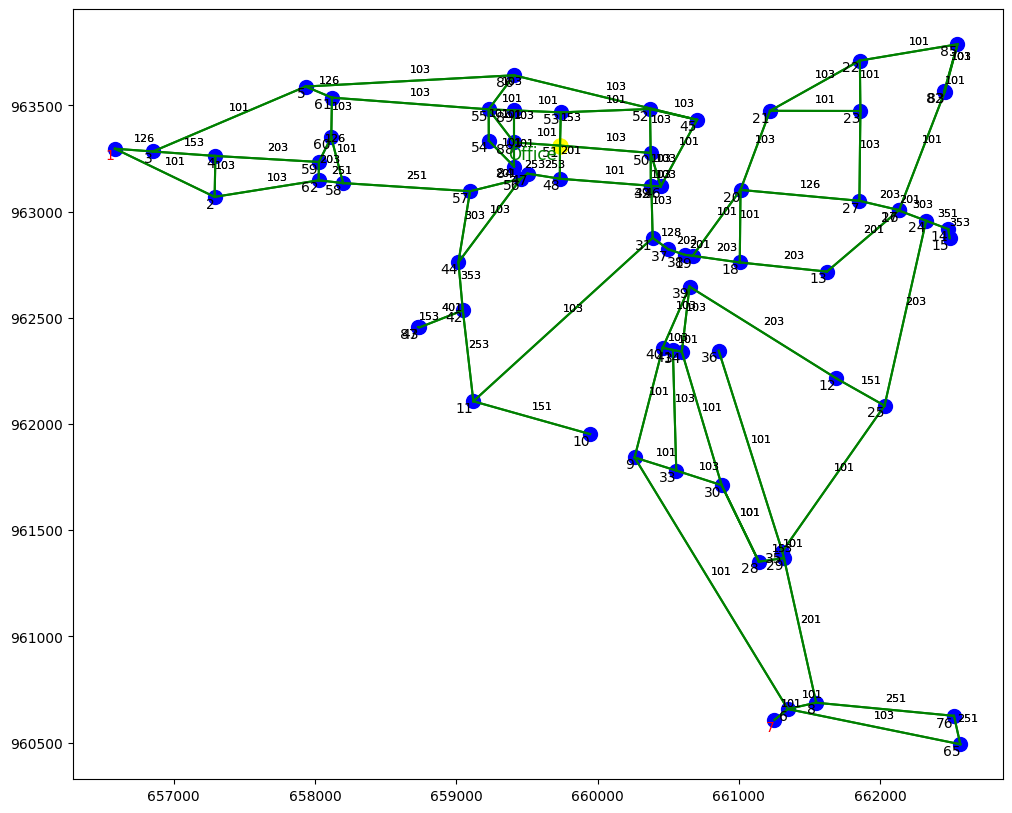

In [60]:
archivo_pes = 'PES.txt'
print(f"Graficando {archivo_pes}")
graficar_grafo_desde_archivo(archivo_pes,'antes',0)

Lectura del archivo NYT

Graficando NYT.txt


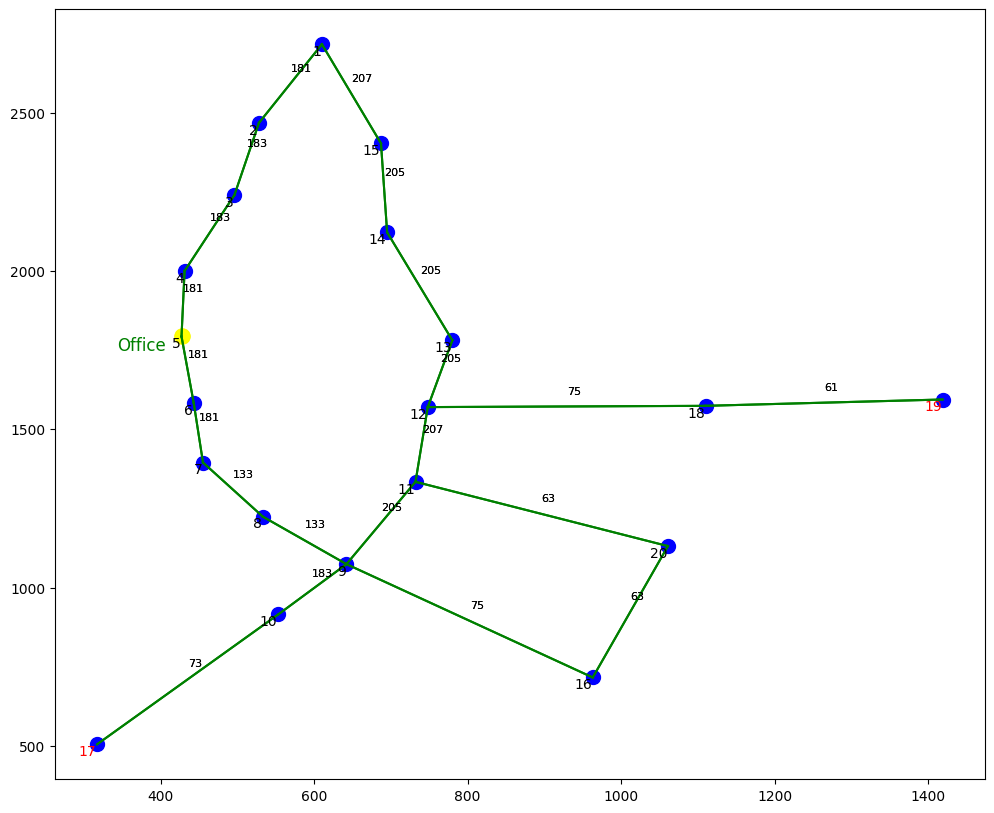

In [61]:
acrhivo_nyt = 'NYT.txt'
print(f"Graficando {acrhivo_nyt}")
graficar_grafo_desde_archivo(acrhivo_nyt,'antes',0)

Lectura del archivo HAN

Graficando HAN.txt


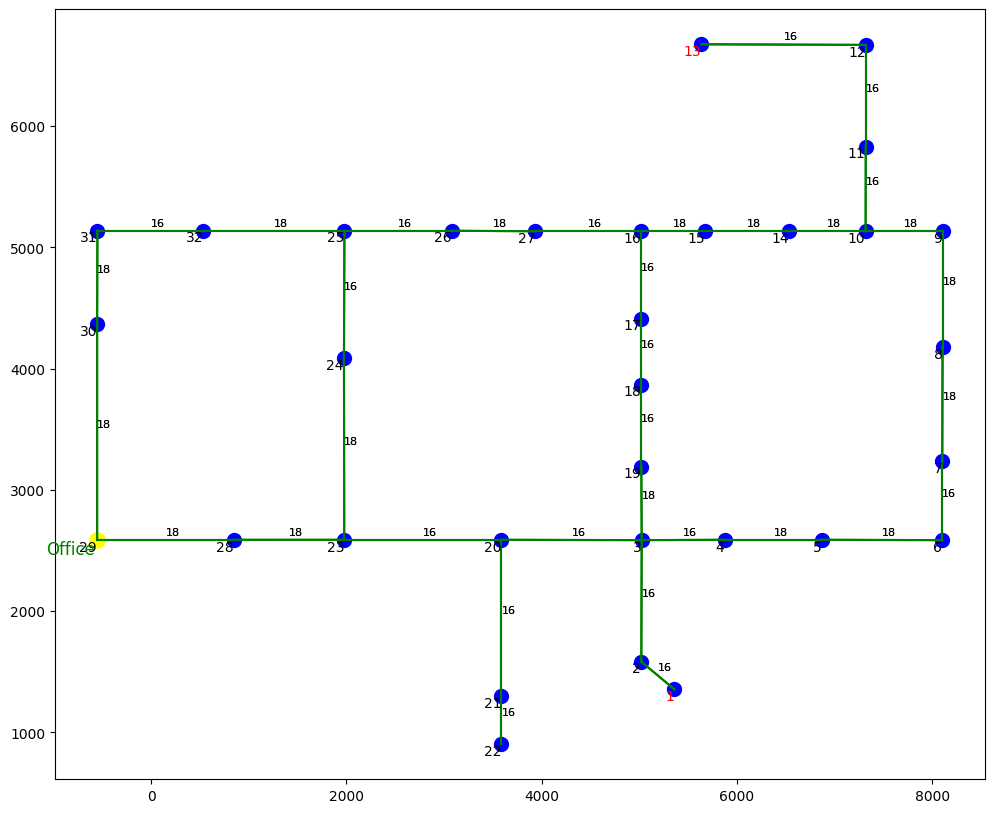

In [62]:
archivo_han = 'HAN.txt'
print(f"Graficando {archivo_han}")
graficar_grafo_desde_archivo(archivo_han,'antes',0)

Lectura del archivo FOS

Graficando FOS.txt


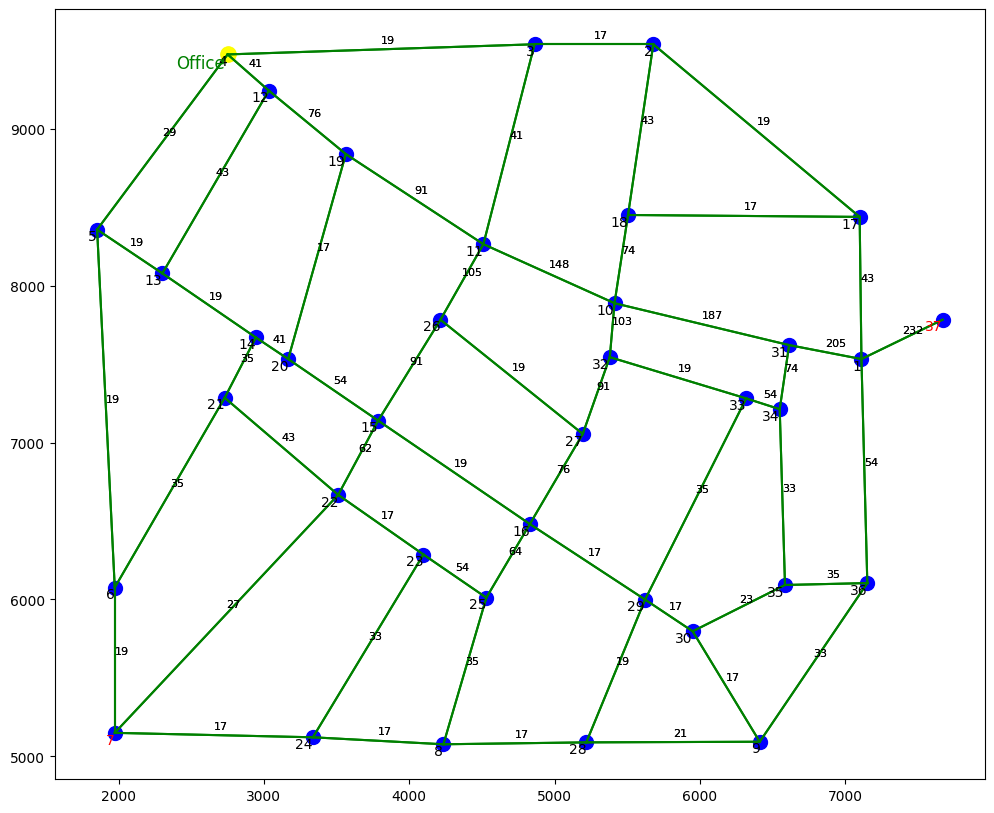

In [63]:
archivo_fos = 'FOS.txt'
print(f"Graficando {archivo_fos}")
graficar_grafo_desde_archivo(archivo_fos,'antes',0)

## 2. Longitud de las tuberías

Calcular longitud de las tuberías

In [64]:
# Función para calcular la longitud de las tuberías
#y devolver el listado con longitud agregada
def calcular_longitud_tuberias(nodos, aristas):
    aristas_con_longitud = {}
    for nodo_id, vecinos in aristas.items():
        aristas_con_longitud[nodo_id] = []
        for vecino_id, capacidad in vecinos:
            x1, y1 = nodos[nodo_id][0]
            x2, y2 = nodos[vecino_id][0]
            # Calcular longitud usando distancia euclidiana
            longitud = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            # Agregar arista con longitud calculada
            aristas_con_longitud[nodo_id].append((vecino_id, capacidad, longitud))

    return aristas_con_longitud

Graficar grafo con las longitudes de cada uno de las tuberías

In [65]:
# Nueva función para graficar el grafo incluyendo longitudes
def graficar_grafo_con_longitud(nodos, aristas_con_longitud, oficina,nombre_archivo,version,opcion):
    plt.figure(figsize=(12, 10))

    # Dibujar nodos y sus etiquetas
    for nodo_id, (coord, es_fuente) in nodos.items():
        x, y = coord
        color = 'red' if es_fuente == 1 else 'black'
        plt.scatter(x, y, color='blue', s=100)
        plt.text(x-10, y, f'{nodo_id}', color=color, fontsize=10, ha='right', va='top')

    # Dibujar aristas con capacidad y longitud
    for nodo_id, vecinos in aristas_con_longitud.items():
        for vecino_id, capacidad, longitud in vecinos:
            x1, y1 = nodos[nodo_id][0]
            x2, y2 = nodos[vecino_id][0]

            # Dibujar la línea de la arista
            plt.plot([x1, x2], [y1, y2], color='green', linewidth=1.5)

            # Calcular posición media para mostrar capacidad y longitud
            x_mid = (x1 + x2) / 2
            y_mid = (y1 + y2) / 2
            plt.text(x_mid, y_mid + 130, f'{int(capacidad)}', color='black', fontsize=8)
            plt.text(x_mid, y_mid + 40,f'{longitud:.2f}', color='black', fontsize=8)

    # Marcar la oficina en un color diferente
    if oficina is not None:
        x, y = nodos[oficina][0]
        plt.scatter(x, y, color='yellow', s=120)
        plt.text(x-20, y, 'Office', color='green', fontsize=12, ha='right', va='top')

    plt.axis('on')
    if opcion != 0:
        # Guardar el gráfico como PNG
        plt.savefig(f"{nombre_archivo[0:3]}_{version}_longitud_tuberias_Grafo.png")
    plt.show()

Función para la lectura del archivo y graficar el grafo con cada una de las longitudes de la tubería

In [66]:
# Función principal para leer, procesar y graficar con longitudes
def procesar_y_graficar_con_longitud(nombre_archivo,version,opcion):
    # Leer el archivo y obtener datos del grafo
    nodos_cant, aristas_cant, nodos, aristas, oficina, nuevos_nodos = lectura_grafo(nombre_archivo)

    # Calcular longitudes de las tuberías
    aristas = calcular_longitud_tuberias(nodos, aristas)
    print(f"Lista de aristas {nombre_archivo}")
    for nodo_id, vecinos in aristas.items():
        print(f"Nodo {nodo_id} a {vecinos[0][0]}: Longitud = {round(vecinos[0][2],2)}")

    if opcion != 0:
      "Escribir en el archivo"
      f = open(f"{nombre_archivo[0:3]}_{version}.txt", "a")

      f.write("\nParte 2 - Longitud de tuberías\n")
      for nodo_id, vecinos in aristas.items():
        f.write(f"Nodo {nodo_id} a {vecinos[0][0]}: Longitud = {round(vecinos[0][2],2)}\n")

    print(f"\nGraficando {nombre_archivo}")

    # Graficar el grafo con longitudes
    graficar_grafo_con_longitud(nodos, aristas, oficina,nombre_archivo,version,opcion)


### Archivos

Lectura del archivo PES

Lista de aristas PES.txt
Nodo 1 a 2: Longitud = 741.69
Nodo 2 a 1: Longitud = 741.69
Nodo 3 a 4: Longitud = 442.94
Nodo 4 a 3: Longitud = 442.94
Nodo 5 a 3: Longitud = 1123.65
Nodo 6 a 7: Longitud = 107.53
Nodo 7 a 6: Longitud = 107.53
Nodo 8 a 6: Longitud = 203.07
Nodo 9 a 6: Longitud = 1605.88
Nodo 10 a 11: Longitud = 841.26
Nodo 11 a 10: Longitud = 841.26
Nodo 15 a 14: Longitud = 44.03
Nodo 14 a 15: Longitud = 44.03
Nodo 13 a 17: Longitud = 583.89
Nodo 17 a 13: Longitud = 583.89
Nodo 18 a 13: Longitud = 618.5
Nodo 19 a 18: Longitud = 334.9
Nodo 20 a 18: Longitud = 341.67
Nodo 21 a 20: Longitud = 426.94
Nodo 22 a 23: Longitud = 237.28
Nodo 23 a 22: Longitud = 237.28
Nodo 24 a 25: Longitud = 918.87
Nodo 25 a 24: Longitud = 918.87
Nodo 26 a 17: Longitud = 3.57
Nodo 27 a 26: Longitud = 284.76
Nodo 28 a 29: Longitud = 178.9
Nodo 29 a 28: Longitud = 178.9
Nodo 30 a 28: Longitud = 445.63
Nodo 31 a 32: Longitud = 244.53
Nodo 32 a 31: Longitud = 244.53
Nodo 33 a 30: Longitud = 328.69
Nodo 34

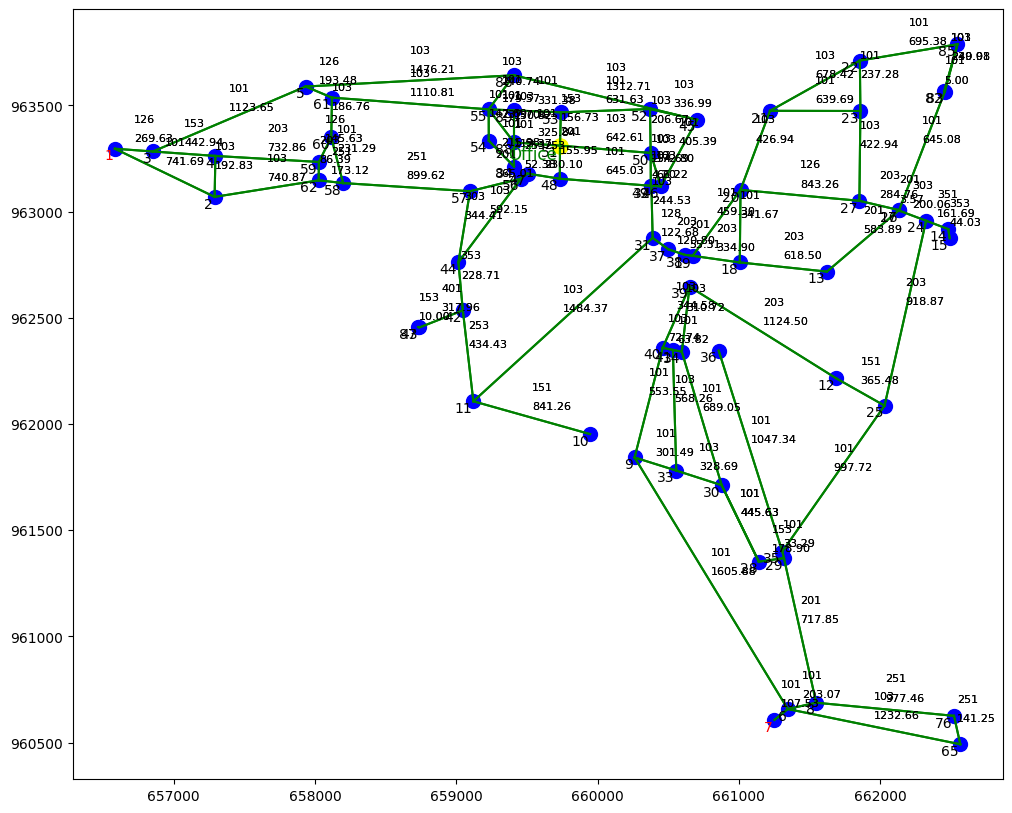

In [67]:
archivo_pes = 'PES.txt'
procesar_y_graficar_con_longitud(archivo_pes,'antes',0)

Lectura del archivo NYT

Graficando NYT.txt
Lista de aristas NYT.txt
Nodo 1 a 2: Longitud = 261.2
Nodo 2 a 1: Longitud = 261.2
Nodo 3 a 2: Longitud = 230.23
Nodo 4 a 3: Longitud = 248.65
Nodo 5 a 4: Longitud = 207.04
Nodo 6 a 5: Longitud = 211.61
Nodo 7 a 6: Longitud = 187.38
Nodo 8 a 7: Longitud = 187.95
Nodo 9 a 8: Longitud = 185.42
Nodo 10 a 9: Longitud = 182.21
Nodo 11 a 9: Longitud = 275.14
Nodo 12 a 11: Longitud = 236.54
Nodo 13 a 12: Longitud = 213.41
Nodo 14 a 13: Longitud = 351.43
Nodo 15 a 14: Longitud = 281.11
Nodo 17 a 10: Longitud = 473.07
Nodo 18 a 12: Longitud = 362.02
Nodo 19 a 18: Longitud = 309.65
Nodo 20 a 11: Longitud = 386.59
Nodo 16 a 20: Longitud = 426.41

Graficando NYT.txt


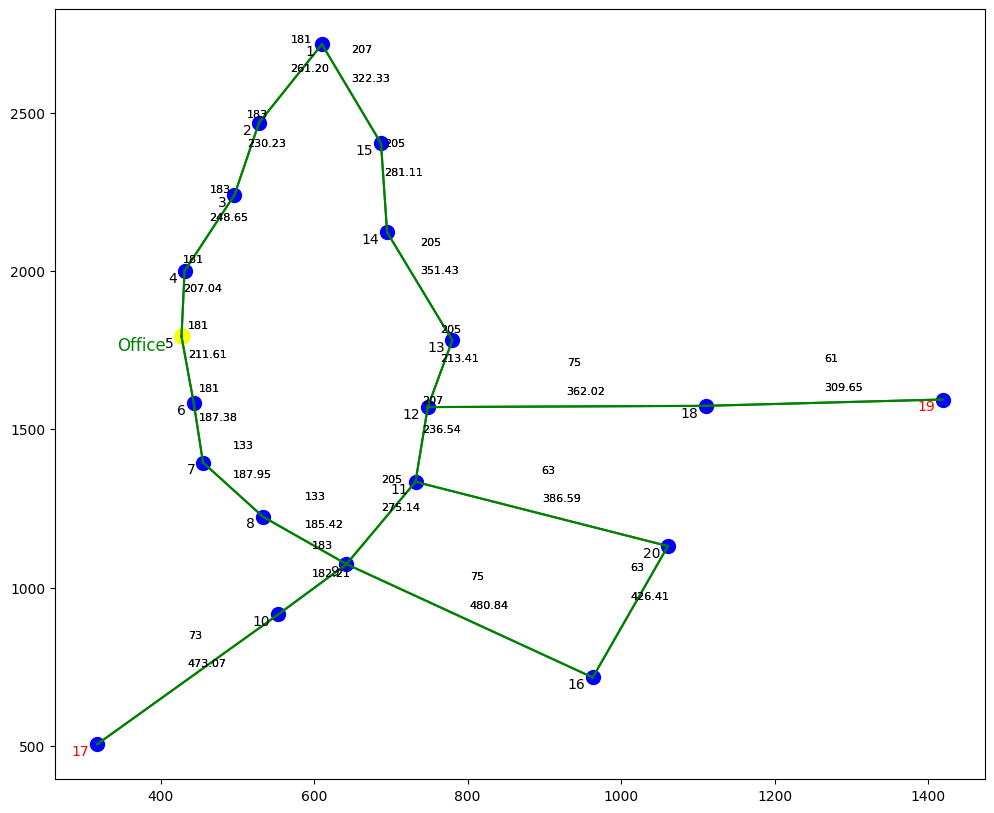

In [68]:
acrhivo_nyt = 'NYT.txt'
print(f"Graficando {acrhivo_nyt}")
procesar_y_graficar_con_longitud(acrhivo_nyt,'antes',0)

Lectura del archivo HAN

Graficando HAN.txt
Lista de aristas HAN.txt
Nodo 1 a 2: Longitud = 409.03
Nodo 2 a 1: Longitud = 409.03
Nodo 3 a 2: Longitud = 1003.26
Nodo 4 a 3: Longitud = 849.02
Nodo 5 a 4: Longitud = 998.89
Nodo 6 a 5: Longitud = 1230.4
Nodo 7 a 6: Longitud = 649.25
Nodo 8 a 7: Longitud = 944.62
Nodo 9 a 8: Longitud = 954.5
Nodo 10 a 9: Longitud = 788.02
Nodo 11 a 10: Longitud = 697.87
Nodo 12 a 11: Longitud = 839.54
Nodo 13 a 12: Longitud = 1683.19
Nodo 14 a 10: Longitud = 788.01
Nodo 15 a 14: Longitud = 854.61
Nodo 16 a 15: Longitud = 654.82
Nodo 17 a 16: Longitud = 721.42
Nodo 18 a 17: Longitud = 543.84
Nodo 19 a 18: Longitud = 677.03
Nodo 20 a 3: Longitud = 1437.33
Nodo 21 a 20: Longitud = 1287.46
Nodo 22 a 21: Longitud = 399.55
Nodo 23 a 20: Longitud = 1609.32
Nodo 24 a 23: Longitud = 1496.05
Nodo 25 a 24: Longitud = 1053.29
Nodo 26 a 25: Longitud = 1097.0
Nodo 27 a 26: Longitud = 856.07
Nodo 28 a 23: Longitud = 1132.51
Nodo 29 a 28: Longitud = 1398.45
Nodo 30 a 29: Longitud = 1780.86
Nodo 31

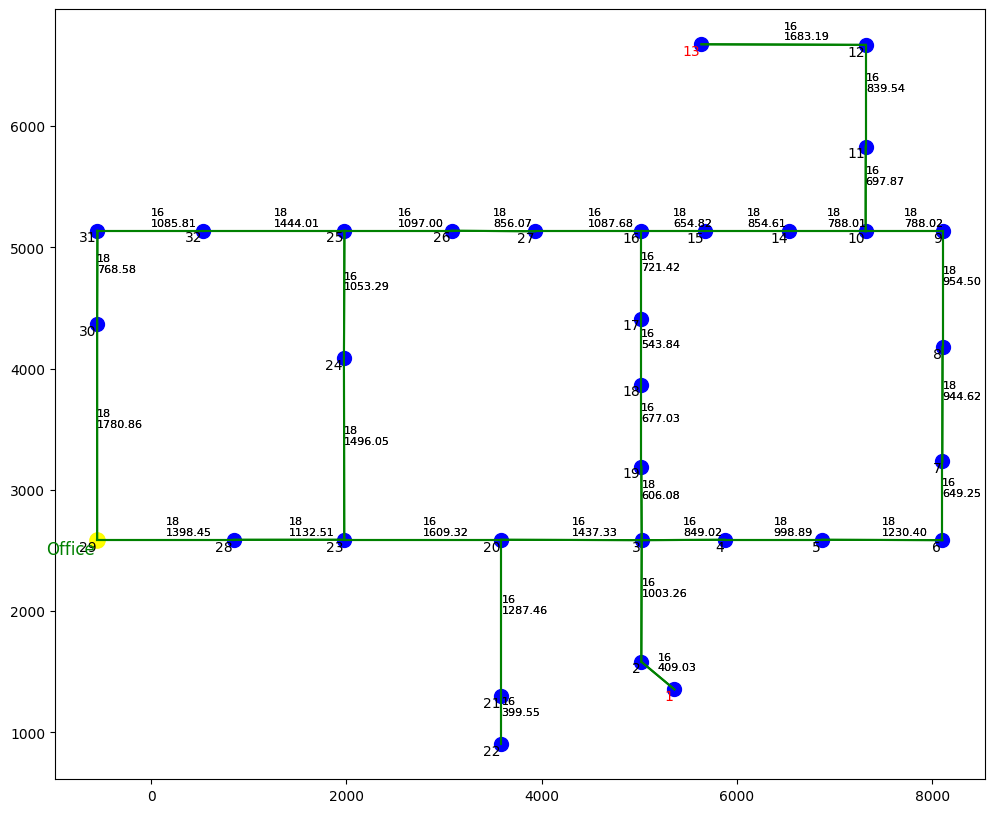

In [69]:
archivo_han = 'HAN.txt'
print(f"Graficando {archivo_han}")
procesar_y_graficar_con_longitud(archivo_han,'antes',0)

Lectura del archivo FOS

Graficando FOS.txt
Lista de aristas FOS.txt
Nodo 1 a 17: Longitud = 906.23
Nodo 17 a 1: Longitud = 906.23
Nodo 2 a 17: Longitud = 1796.34
Nodo 3 a 2: Longitud = 817.15
Nodo 4 a 3: Longitud = 2112.64
Nodo 5 a 4: Longitud = 1432.86
Nodo 6 a 5: Longitud = 2284.79
Nodo 7 a 6: Longitud = 926.37
Nodo 24 a 7: Longitud = 1363.56
Nodo 8 a 24: Longitud = 899.16
Nodo 28 a 8: Longitud = 983.08
Nodo 9 a 28: Longitud = 1193.37
Nodo 36 a 9: Longitud = 1253.32
Nodo 31 a 1: Longitud = 505.47
Nodo 10 a 31: Longitud = 1230.77
Nodo 11 a 10: Longitud = 977.4
Nodo 19 a 11: Longitud = 1107.26
Nodo 12 a 19: Longitud = 666.69
Nodo 18 a 2: Longitud = 1102.0
Nodo 32 a 10: Longitud = 345.37
Nodo 27 a 32: Longitud = 523.66
Nodo 16 a 27: Longitud = 680.09
Nodo 25 a 16: Longitud = 556.61
Nodo 26 a 11: Longitud = 564.75
Nodo 15 a 26: Longitud = 773.03
Nodo 22 a 15: Longitud = 547.43
Nodo 13 a 5: Longitud = 528.72
Nodo 14 a 13: Longitud = 762.0
Nodo 20 a 14: Longitud = 261.58
Nodo 29 a 16: Longitud = 927.57
Nodo 30 a 

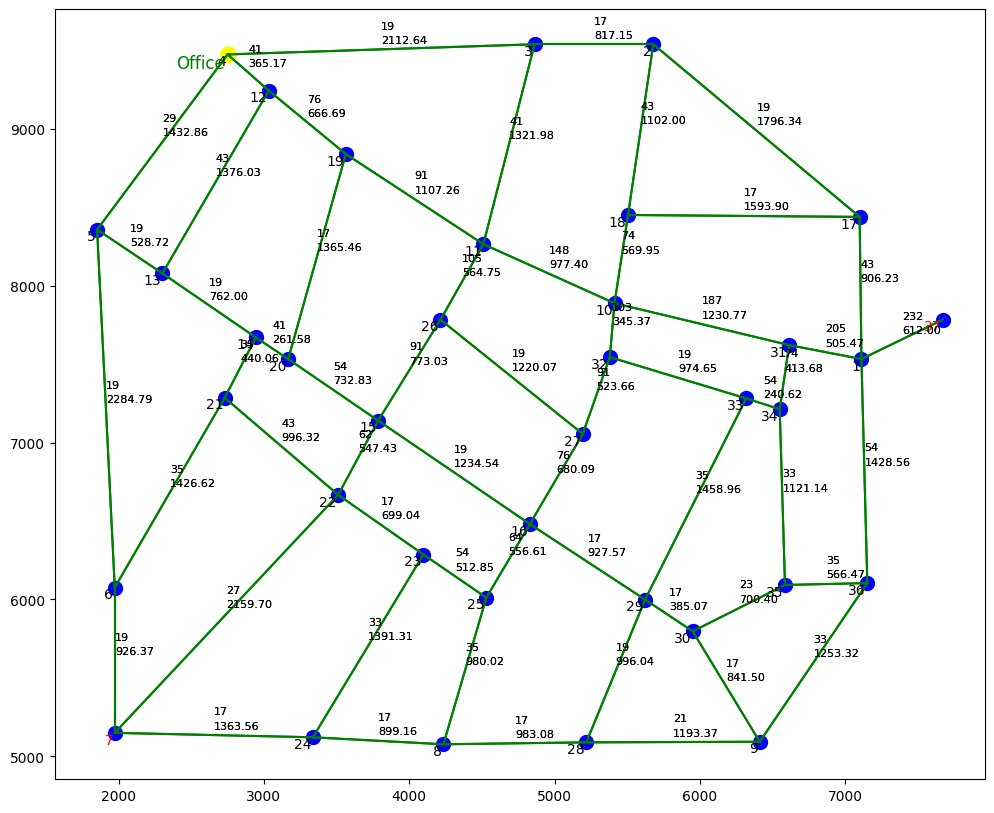

In [70]:
archivo_fos = 'FOS.txt'
print(f"Graficando {archivo_fos}")
procesar_y_graficar_con_longitud(archivo_fos,'antes',0)

## 3. Sectorización

In [71]:
def distancia_entre_nodos(nodos, nodo1, nodo2):
  x1, y1 = nodos[nodo1][0]
  x2, y2 = nodos[nodo2][0]
  return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [72]:
def dijkstra(nodos, aristas, nodoOrigen, fuente):
    distancias = [float('inf')] * max(nodos)
    distancias[nodoOrigen - 1] = 0
    procesado = [False] * max(nodos)
    predecesor = [-1] * max(nodos)
    fila = []
    heapq.heappush(fila, (0, nodoOrigen))
    while fila:
        distanciaActual, nodoActual = heapq.heappop(fila)
        if procesado[nodoActual - 1]:
            continue
        procesado[nodoActual - 1] = True
        for vecino, _ in aristas[nodoActual]:
            distanciaNueva = distanciaActual + distancia_entre_nodos(nodos, nodoActual, vecino)
            if distanciaNueva < distancias[vecino - 1]:
                distancias[vecino - 1] = distanciaNueva
                predecesor[vecino - 1] = nodoActual
                if not procesado[vecino - 1]:
                    heapq.heappush(fila, (distanciaNueva, vecino))
    DistanciaTotal = distancias[fuente - 1]
    return DistanciaTotal if DistanciaTotal != float('inf') else None


La asignación de sectores a base de las fuentes más cercana

In [73]:
def asignar_sectores(nodos, aristas, fuentes):
    sectores = {fuente: [] for fuente in fuentes}
    nodo_a_sector = {}
    for nodo_id, (coord, es_fuente) in nodos.items():
        distancia_minima = float('inf')
        fuente_cercana = None
        for fuente in fuentes:
            distancia = dijkstra(nodos, aristas, nodo_id, fuente)
            if distancia is not None and distancia < distancia_minima:
                distancia_minima = distancia
                fuente_cercana = fuente
        if fuente_cercana:
            sectores[fuente_cercana].append(nodo_id)
            nodo_a_sector[nodo_id] = fuente_cercana
    return sectores, nodo_a_sector

Función para considerar que tuberías deben de cerrarse

In [74]:
def determinar_tuberias_a_cerrar(aristas, nodo_a_sector):
    tuberias_a_cerrar = []
    for nodo_id, vecinos in aristas.items():
        for vecino_id, _ in vecinos:
            # Si los nodos están en sectores diferentes, marcar la tubería para cerrarla
            if nodo_a_sector[nodo_id] != nodo_a_sector[vecino_id]:
                tuberia = tuple(sorted((nodo_id, vecino_id)))
                if tuberia not in tuberias_a_cerrar:
                    tuberias_a_cerrar.append(tuberia)
    return tuberias_a_cerrar

Graficar el grafo con las tuberías cerradas

In [75]:
def graficar_sectores(nodos, aristas, sectores, nodo_a_sector, tuberias_a_cerrar, oficina,nombre_archivo,version,opcion):
    plt.figure(figsize=(12, 10))
    # Colores fijos para cada sector (rojo y verde)
    colores_sector = {list(sectores.keys())[0]: 'blue', list(sectores.keys())[1]: 'orange'}
    # Dibujar nodos con colores de sector
    for nodo_id, (coord, es_fuente) in nodos.items():
        x, y = coord
        color = colores_sector[nodo_a_sector[nodo_id]]
        plt.scatter(x, y, color=color, s=100)
        color2 = 'red' if es_fuente == 1 else 'black'
        plt.text(x-10, y, f'{nodo_id}', color=color2, fontsize=10, ha='right', va='top')
    # Dibujar aristas y marcar las cerradas
    for nodo_id, vecinos in aristas.items():
        for vecino_id, _ in vecinos:
            x1, y1 = nodos[nodo_id][0]
            x2, y2 = nodos[vecino_id][0]
            tuberia = tuple(sorted((nodo_id, vecino_id)))
            # Tubería cerrada (en rojo)
            if tuberia in tuberias_a_cerrar:
                plt.plot([x1, x2], [y1, y2], color='red', linewidth=2)
            else:
                plt.plot([x1, x2], [y1, y2], color='green', linewidth=1.5)
    # Marcar la oficina si existe
    if oficina is not None:
        x, y = nodos[oficina][0]
        plt.scatter(x, y, color='yellow', s=120, edgecolor='black')
        plt.text(x - 20, y, 'Office', color='green', fontsize=12, ha='right', va='top')
    plt.axis('on')
    if opcion != 0:
        # Guardar el gráfico como PNG
        plt.savefig(f"{nombre_archivo[0:3]}_{version}_Sectorización_Grafo.png")
    plt.show()

Leer el archivo y graficarlo con las tuberías cerradas

In [76]:
def sectorizar_y_graficar(nombre_archivo,version,opcion):
    # Leer el archivo y obtener datos del grafo
    nodos_cant, aristas_cant, nodos, aristas, oficina, nuevos_nodos = lectura_grafo(nombre_archivo)
    # Identificar las fuentes (nodos con es_fuente == 1)
    fuentes = [nodo_id for nodo_id, (_, es_fuente) in nodos.items() if es_fuente == 1]
    # Asignar cada nodo a su sector correspondiente
    sectores, nodo_a_sector = asignar_sectores(nodos, aristas, fuentes)
    # Determinar las tuberías que deben cerrarse
    tuberias_a_cerrar = determinar_tuberias_a_cerrar(aristas, nodo_a_sector)
    # Reportar los sectores y tuberías cerradas
    print("Sectores:")
    for fuente, nodos_sector in sectores.items():
      print(f"Fuente {fuente}: Nodos -> {nodos_sector}")
    print("\nTuberías a cerrar:")
    for tuberia in tuberias_a_cerrar:
        print(f"Tubería {tuberia[0]} - {tuberia[1]}")

    if opcion != 0:
      f = open(f"{nombre_archivo[0:3]}_{version}.txt", "a")
      f.write("\nParte 3 - Sectorización\n")
      f.write("Sectores:\n")
      for fuente, nodos_sector in sectores.items():
        f.write(f"Fuente {fuente}: Nodos -> {nodos_sector}\n")
      f.write("\nTuberías a cerrar:\n")
      for tuberia in tuberias_a_cerrar:
        f.write(f"Tubería {tuberia[0]} - {tuberia[1]}\n")

    # Graficar sectores y tuberías cerradas
    graficar_sectores(nodos, aristas, sectores, nodo_a_sector, tuberias_a_cerrar, oficina,nombre_archivo,version,opcion)

### Archivos

Lectura del archivo PES

Graficando PES.txt
Sectores:
Fuente 1: Nodos -> [1, 2, 3, 4, 5, 10, 11, 19, 31, 32, 37, 38, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 84, 86, 87, 88, 89, 43]
Fuente 7: Nodos -> [6, 7, 8, 9, 12, 13, 14, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 76, 82, 83, 85, 65, 15]

Tuberías a cerrar:
Tubería 18 - 19
Tubería 19 - 20


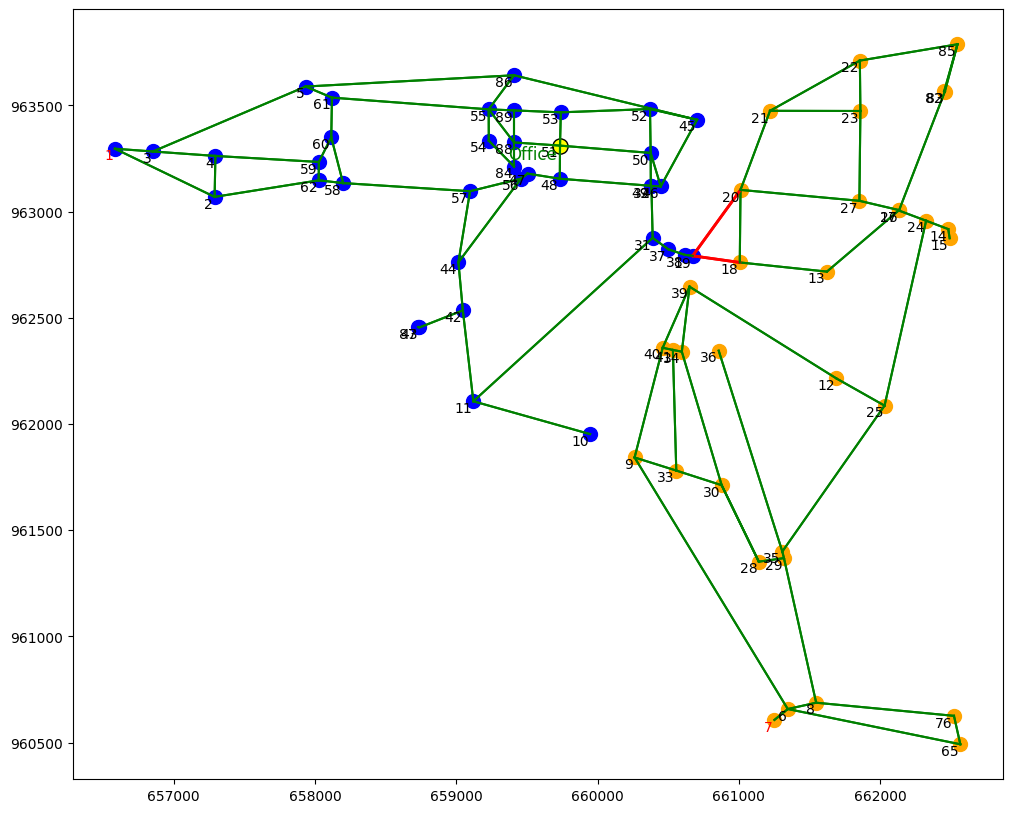

In [77]:
archivo_pes = 'PES.txt'
print(f"Graficando {archivo_pes}")
sectorizar_y_graficar(archivo_pes,'antes',0)

Lectura del archivo NYT

Graficando NYT.txt
Sectores:
Fuente 17: Nodos -> [3, 4, 5, 6, 7, 8, 9, 10, 16, 17]
Fuente 19: Nodos -> [2, 11, 12, 13, 14, 15, 18, 19, 20, 1]

Tuberías a cerrar:
Tubería 2 - 3
Tubería 9 - 11
Tubería 16 - 20


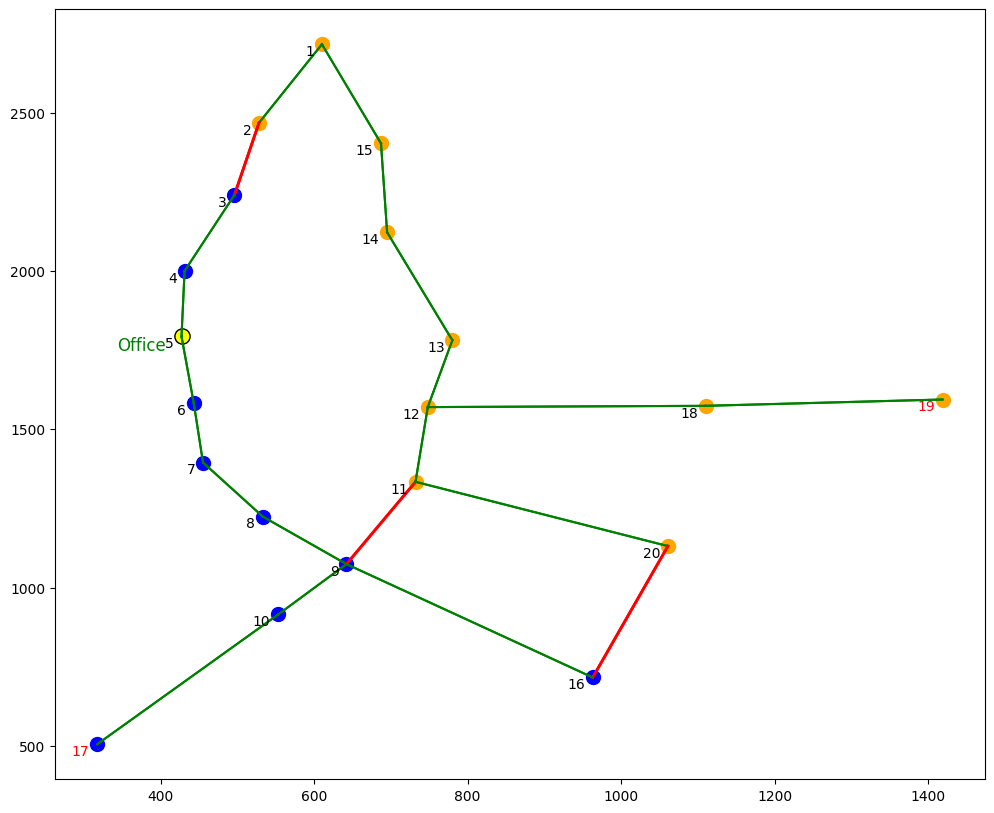

In [78]:
acrhivo_nyt = 'NYT.txt'
print(f"Graficando {acrhivo_nyt}")
sectorizar_y_graficar(acrhivo_nyt,'antes',0)

Lectura del archivo HAN

Graficando HAN.txt
Sectores:
Fuente 13: Nodos -> [8, 9, 10, 11, 12, 13, 14]
Fuente 1: Nodos -> [2, 3, 4, 5, 6, 7, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 1]

Tuberías a cerrar:
Tubería 7 - 8
Tubería 14 - 15


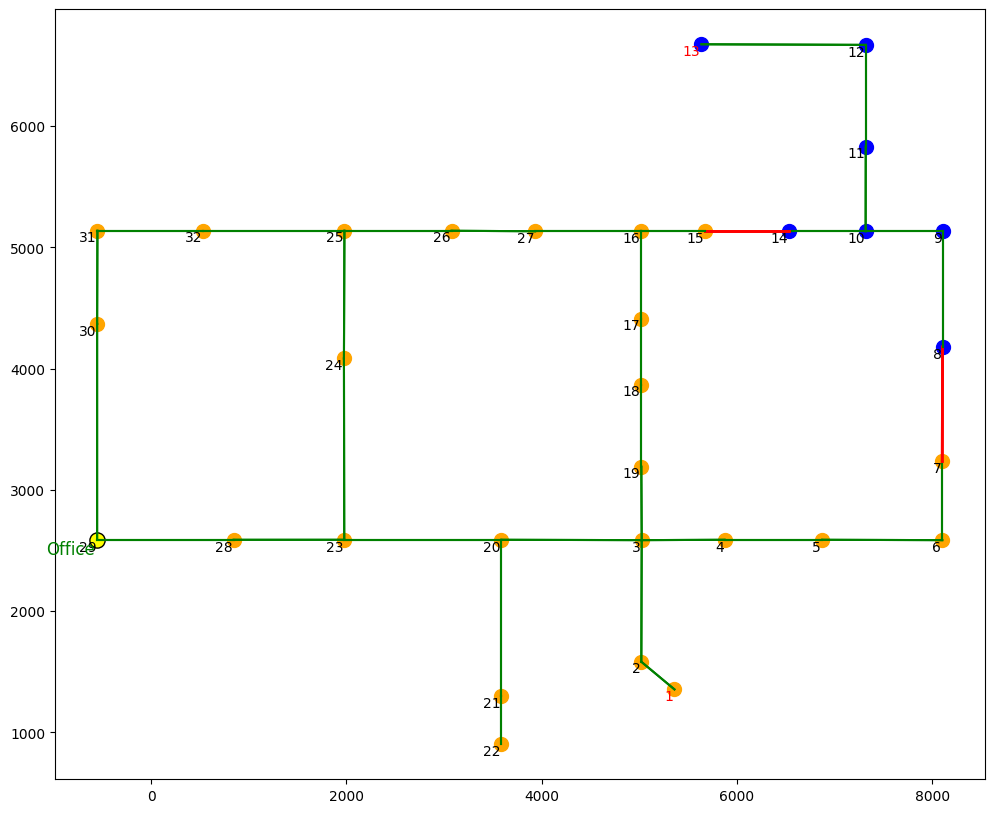

In [79]:
archivo_han = 'HAN.txt'
print(f"Graficando {archivo_han}")
sectorizar_y_graficar(archivo_han,'antes',0)

Lectura del archivo FOS

Graficando FOS.txt
Sectores:
Fuente 7: Nodos -> [4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 28]
Fuente 37: Nodos -> [2, 3, 9, 10, 11, 17, 18, 27, 29, 30, 31, 32, 33, 34, 35, 36, 1, 37]

Tuberías a cerrar:
Tubería 3 - 4
Tubería 9 - 28
Tubería 28 - 29
Tubería 11 - 19
Tubería 11 - 26
Tubería 16 - 27
Tubería 26 - 27
Tubería 16 - 29


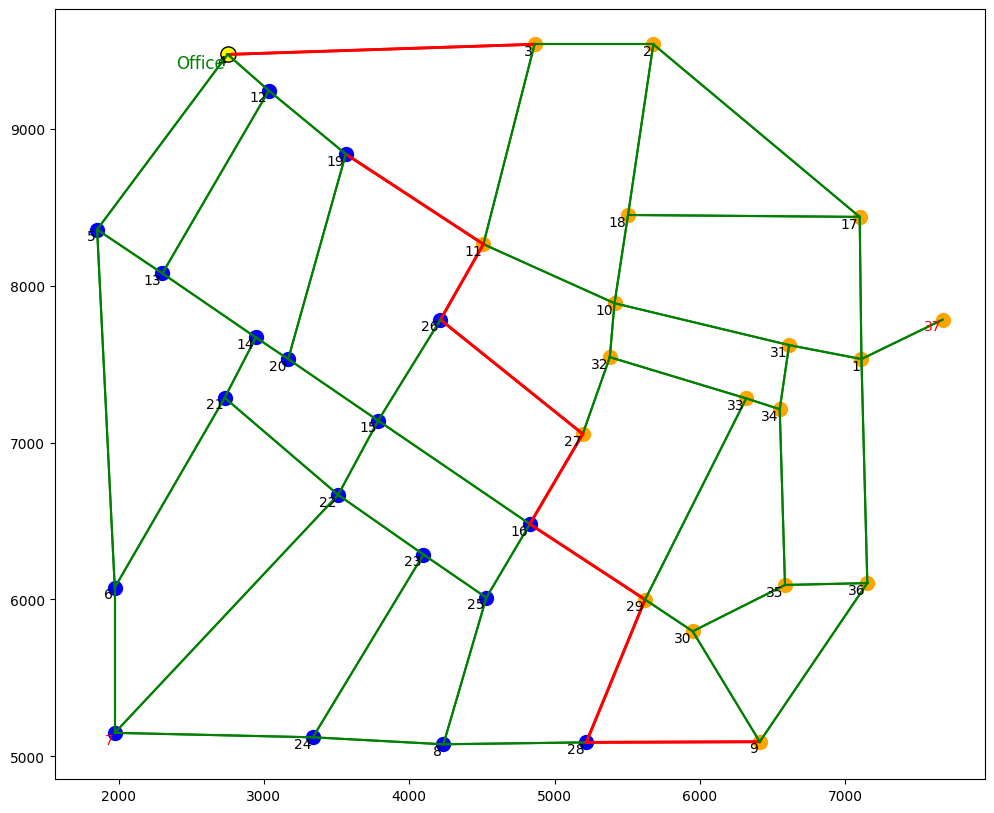

In [80]:
archivo_fos = 'FOS.txt'
print(f"Graficando {archivo_fos}")
sectorizar_y_graficar(archivo_fos,'antes',0)

## 4. Frescura del agua en función de la distancia del nodo a la fuente

Calcular la distancia del nodo más lejano al nodo fuente

In [81]:
def calcular_distancias_y_caminos_desde_fuente(nodos, aristas, fuente):
    distancias = {nodo: float('inf') for nodo in nodos}
    distancias[fuente] = 0
    caminos = {nodo: [] for nodo in nodos}
    caminos[fuente] = [fuente]
    pendientes = list(nodos.keys())
    while pendientes:
        nodo_actual = min(pendientes, key=lambda nodo: distancias[nodo])
        distancia_actual = distancias[nodo_actual]
        if distancia_actual == float('inf'):
            break
        pendientes.remove(nodo_actual)
        for vecino, capacidad in aristas[nodo_actual]:
            x1, y1 = nodos[nodo_actual][0]
            x2, y2 = nodos[vecino][0]
            longitud = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            distancia_nueva = distancia_actual + longitud
            if distancia_nueva < distancias[vecino]:
                distancias[vecino] = distancia_nueva
                caminos[vecino] = caminos[nodo_actual] + [vecino]
    return distancias, caminos

Función para determinar el nodo más lejano de la fuente

In [82]:
def nodos_mas_lejanos_y_caminos_por_sector(nodos, aristas, sectores):
    resultados = []

    for fuente, nodos_sector in sectores.items():
        distancias, caminos = calcular_distancias_y_caminos_desde_fuente(nodos, aristas, fuente)
        nodo_mas_lejano = max(nodos_sector, key=lambda nodo: distancias[nodo])
        distancia_maxima = distancias[nodo_mas_lejano]
        camino = caminos[nodo_mas_lejano]
        resultados.append((fuente, nodo_mas_lejano, distancia_maxima, camino))

    return resultados


Función para reportar la frescura del agua en cada sector y generar el gráfico con los caminos


In [83]:
def reportar_frescura_agua(nombre_archivo,version,opcion):
    nodos_cant, aristas_cant, nodos, aristas, oficina, nuevos_nodos = lectura_grafo(nombre_archivo)
    fuentes = [nodo_id for nodo_id, (_, es_fuente) in nodos.items() if es_fuente == 1]
    sectores, nodo_a_sector = asignar_sectores(nodos, aristas, fuentes)

    resultados = nodos_mas_lejanos_y_caminos_por_sector(nodos, aristas, sectores)

    print("Reporte de frescura del agua:")
    for fuente, nodo_mas_lejano, distancia, camino in resultados:
        print(f"Sector con fuente en {fuente}: Nodo más lejano -> {nodo_mas_lejano}, Distancia = {distancia:.2f}")
        print(f"Camino: {' -> '.join(map(str, camino))}")


    if opcion != 0:
      f = open(f"{nombre_archivo[0:3]}_{version}.txt", "a")
      f.write("\nParte 4 - Reporte de frescura del agua\n")
      for fuente, nodo_mas_lejano, distancia, camino in resultados:
        f.write(f"Sector con fuente en {fuente}: Nodo más lejano -> {nodo_mas_lejano}, Distancia = {distancia:.2f}\n")
        f.write(f"Camino: {' -> '.join(map(str, camino))}\n")




    # Generar el gráfico
    plt.figure(figsize=(10, 10))
    for nodo, (coord, es_fuente) in nodos.items():
        x, y = coord
        plt.plot(x, y, 'o', color='blue')  # Círculos azules para todos los nodos

        # Cambiar el color del texto según si es fuente o nodo más lejano
        color_texto = 'red' if nodo in fuentes or any(nodo_mas_lejano == nodo for _, nodo_mas_lejano, _, _ in resultados) else 'black'
        plt.text(x, y, f'{nodo}', fontsize=12, ha='right', color=color_texto)

    # Dibujar las aristas y mostrar su longitud
    for nodo, vecinos in aristas.items():
        x1, y1 = nodos[nodo][0]
        for vecino, capacidad in vecinos:
            x2, y2 = nodos[vecino][0]
            longitud = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            plt.plot([x1, x2], [y1, y2], 'g-', alpha=0.5)
            plt.text((x1 + x2) / 2, (y1 + y2) / 2, f'{longitud:.2f}', color='black', fontsize=8, ha='center')

    # Dibujar los caminos en azul
    for fuente, nodo_mas_lejano, distancia, camino in resultados:
        for i in range(len(camino) - 1):
            x1, y1 = nodos[camino[i]][0]
            x2, y2 = nodos[camino[i + 1]][0]
            plt.plot([x1, x2], [y1, y2], 'b-', linewidth=2)  # Línea azul para cada tramo del camino

    plt.title("Grafo con Caminos Más Cortos hasta los Nodos Más Lejanos en Cada Sector")
    plt.axis("on")
    if opcion != 0:
        # Guardar el gráfico como PNG
        plt.savefig(f"{nombre_archivo[0:3]}_{version}_Nodo_lejano_Grafo.png")
    plt.show()

### Archivos

Lectura del archivo PES

Graficando PES.txt
Reporte de frescura del agua:
Sector con fuente en 1: Nodo más lejano -> 10, Distancia = 4404.11
Camino: 1 -> 2 -> 62 -> 58 -> 57 -> 44 -> 42 -> 11 -> 10
Sector con fuente en 7: Nodo más lejano -> 21, Distancia = 4529.34
Camino: 7 -> 6 -> 8 -> 29 -> 35 -> 25 -> 24 -> 17 -> 26 -> 27 -> 23 -> 21


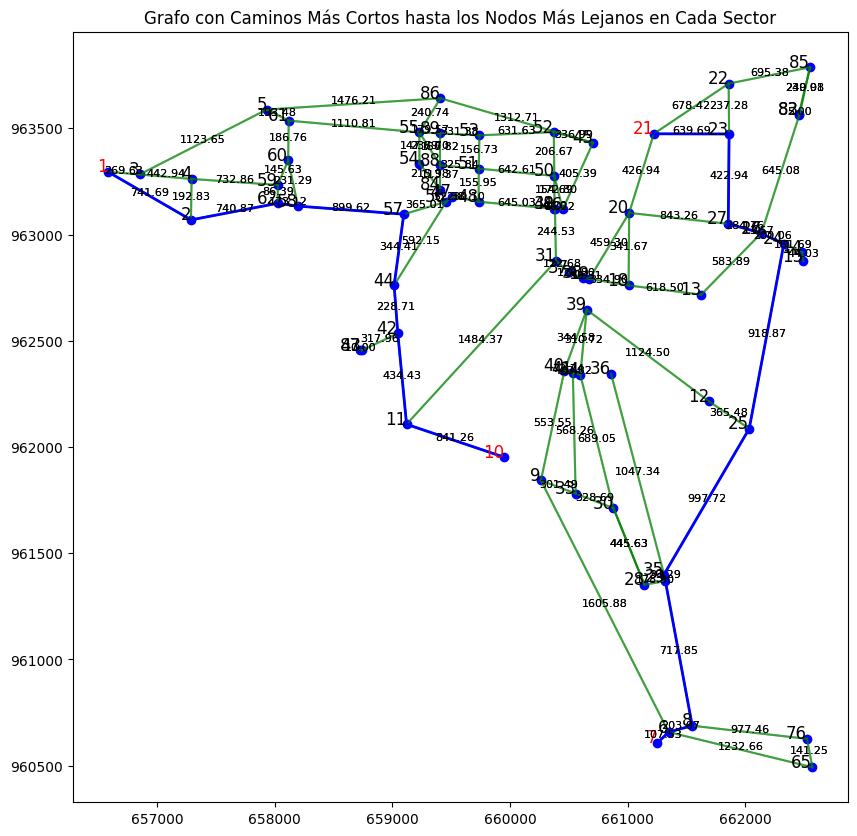

In [84]:
archivo_pes = 'PES.txt'
print(f"Graficando {archivo_pes}")
reportar_frescura_agua(archivo_pes,'antes',0)

Lectura del archivo NYT

Graficando NYT.txt
Reporte de frescura del agua:
Sector con fuente en 17: Nodo más lejano -> 3, Distancia = 1883.33
Camino: 17 -> 10 -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3
Sector con fuente en 19: Nodo más lejano -> 2, Distancia = 2101.17
Camino: 19 -> 18 -> 12 -> 13 -> 14 -> 15 -> 1 -> 2


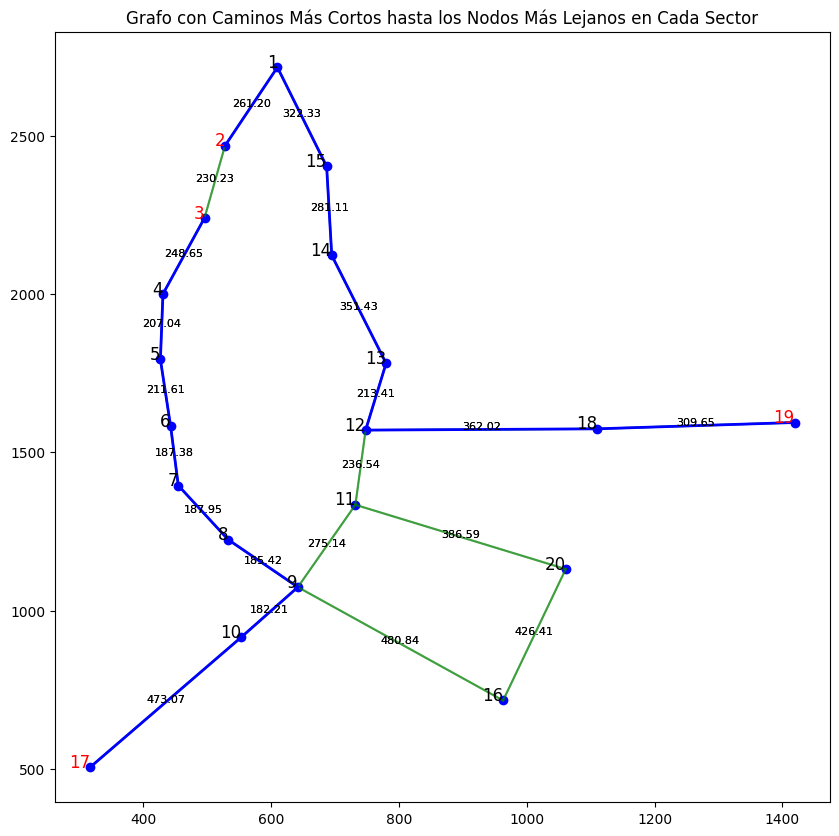

In [85]:
acrhivo_nyt = 'NYT.txt'
print(f"Graficando {acrhivo_nyt}")
reportar_frescura_agua(acrhivo_nyt,'antes',0)

Lectura del archivo HAN

Graficando HAN.txt
Reporte de frescura del agua:
Sector con fuente en 13: Nodo más lejano -> 8, Distancia = 4963.12
Camino: 13 -> 12 -> 11 -> 10 -> 9 -> 8
Sector con fuente en 1: Nodo más lejano -> 31, Distancia = 9531.23
Camino: 1 -> 2 -> 3 -> 19 -> 18 -> 17 -> 16 -> 27 -> 26 -> 25 -> 32 -> 31


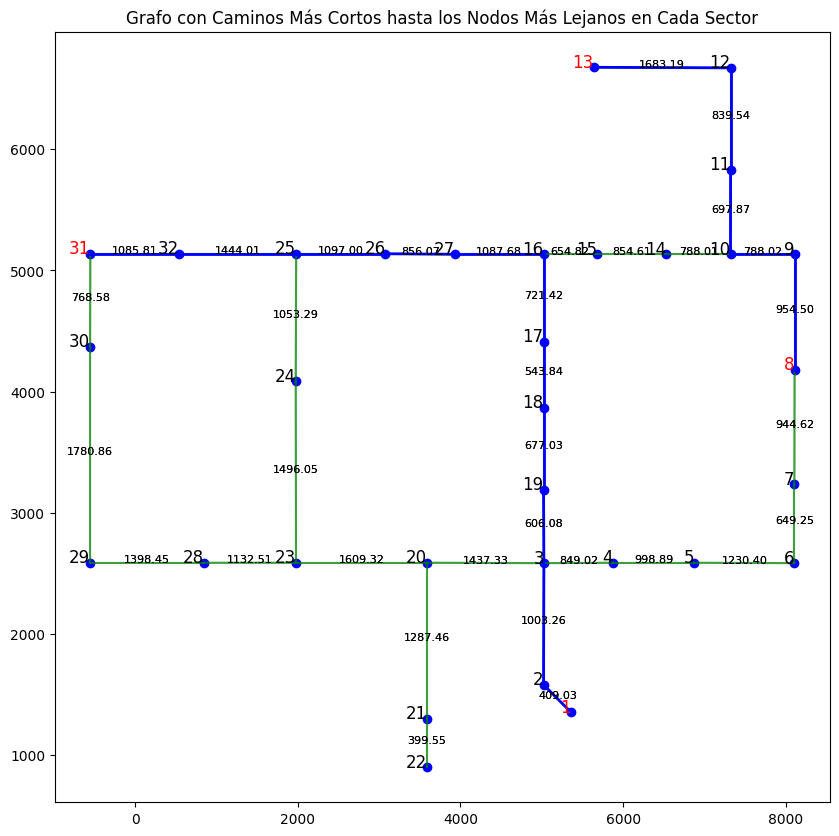

In [86]:
archivo_han = 'HAN.txt'
print(f"Graficando {archivo_han}")
reportar_frescura_agua(archivo_han,'antes',0)

Lectura del archivo FOS

Graficando FOS.txt
Reporte de frescura del agua:
Sector con fuente en 7: Nodo más lejano -> 12, Distancia = 4931.09
Camino: 7 -> 6 -> 21 -> 14 -> 13 -> 12
Sector con fuente en 37: Nodo más lejano -> 3, Distancia = 4131.72
Camino: 37 -> 1 -> 17 -> 2 -> 3


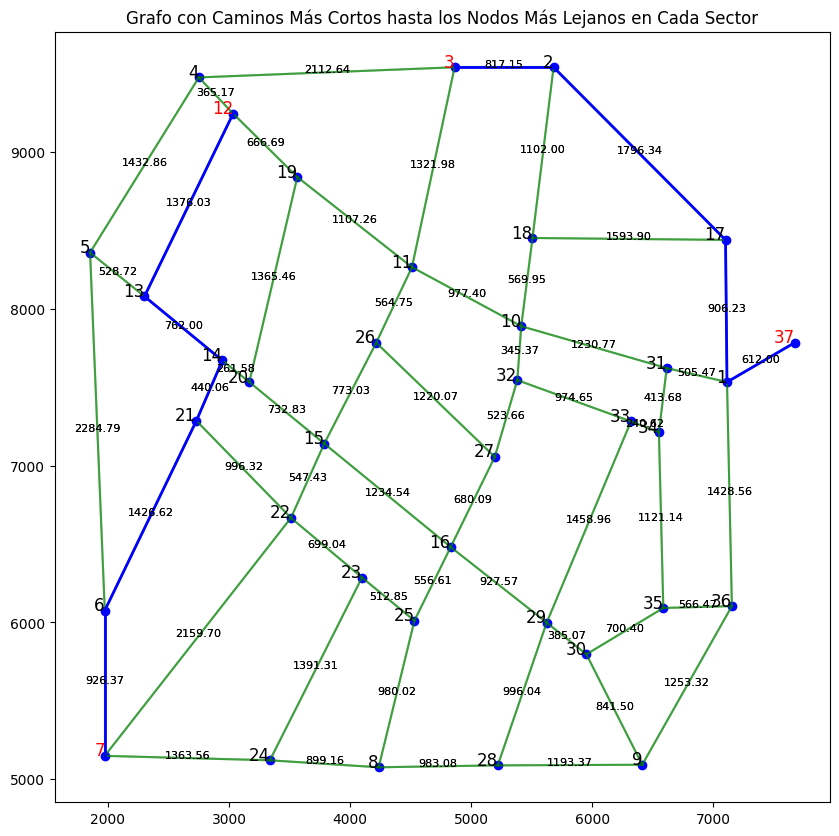

In [87]:
archivo_fos = 'FOS.txt'
print(f"Graficando {archivo_fos}")
reportar_frescura_agua(archivo_fos,'antes',0)

## 5. Flujo máximo de cada sector

Construey las redes residuales con el mapeo de nodos consecutivos

In [88]:
# Construir la red residual con mapeo de nodos consecutivos
def construir_red_residual(nodos, aristas, sector):
    # Crear un mapeo de nodos a índices consecutivos
    nodo_a_indice = {nodo: i for i, nodo in enumerate(sector)}
    n = len(sector)
    R = [[0] * n for _ in range(n)]  # Matriz de capacidad residual

    # Construir la red residual usando el mapeo
    for nodo1, vecinos in aristas.items():
        if nodo1 not in sector:
            continue
        for nodo2, capacidad in vecinos:
            if nodo2 in sector:
                i, j = nodo_a_indice[nodo1], nodo_a_indice[nodo2]
                R[i][j] = capacidad

    return R, nodo_a_indice


Hace la funcion del Ford fulkerson para obtener la formula del flujo maximo

In [89]:
# Implementación de Ford-Fulkerson para encontrar el flujo máximo
def ford_fulkerson(R, source, sink):
    n = len(R)
    max_flow = 0
    residual = [row[:] for row in R]

    def bfs():
        visited = [False] * n
        parent = [-1] * n
        queue = [source]
        visited[source] = True

        while queue:
            u = queue.pop(0)
            for v in range(n):
                if not visited[v] and residual[u][v] > 0:
                    queue.append(v)
                    visited[v] = True
                    parent[v] = u
                    if v == sink:
                        path = []
                        flujo = float('inf')
                        curr = v
                        while curr != source:
                            prev = parent[curr]
                            flujo = min(flujo, residual[prev][curr])
                            path.append(curr)
                            curr = prev
                        path.append(source)
                        return path[::-1], flujo
        return None, 0

    while True:
        path, flujo = bfs()
        if not path:
            break
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            residual[u][v] -= flujo
            residual[v][u] += flujo
        max_flow += flujo

    return max_flow, residual

Calcular el flujo máximo por sector

In [90]:
# Flujo máximo por sector
def flujo_maximo_por_sector(nodos, aristas, sectores):
    resultados = []

    for fuente, nodos_sector in sectores.items():
        # Determinar el nodo más lejano
        distancias, _ = calcular_distancias_y_caminos_desde_fuente(nodos, aristas, fuente)
        nodo_mas_lejano = max(nodos_sector, key=lambda nodo: distancias[nodo])

        # Construir la red residual para este sector
        R, nodo_a_indice = construir_red_residual(nodos, aristas, nodos_sector)

        # Mapear fuente y nodo más lejano a sus índices
        fuente_idx = nodo_a_indice[fuente]
        destino_idx = nodo_a_indice[nodo_mas_lejano]

        # Aplicar Ford-Fulkerson para calcular el flujo máximo
        max_flow, red_residual = ford_fulkerson(R, fuente_idx, destino_idx)

        # Registrar las capacidades utilizadas en cada tubería
        capacidades_utilizadas = []
        for u in range(len(nodos_sector)):
            for v in range(len(nodos_sector)):
                if R[u][v] > 0:  # Si había capacidad original
                    flujo_usado = R[u][v] - red_residual[u][v]
                    if flujo_usado > 0:
                        # Mapear índices de vuelta a nodos originales
                        nodo_u = list(nodo_a_indice.keys())[list(nodo_a_indice.values()).index(u)]
                        nodo_v = list(nodo_a_indice.keys())[list(nodo_a_indice.values()).index(v)]
                        capacidades_utilizadas.append((nodo_u, nodo_v, flujo_usado))

        # Guardar resultados
        resultados.append({
            'fuente': fuente,
            'flujo_maximo': max_flow,
            'capacidades_utilizadas': capacidades_utilizadas
        })

    return resultados

Por ultimo, calcula y reporta cual es el flujo maximo de cada archivo

In [91]:
# Función para ejecutar todo el proceso
def calcular_y_reportar_flujo_maximo(nombre_archivo,version,opcion):
    # Leer el archivo y preparar el grafo
    nodos_cant, aristas_cant, nodos, aristas, oficina, nuevos_nodos = lectura_grafo(nombre_archivo)

    # Obtener las fuentes
    fuentes = [nodo_id for nodo_id, (_, es_fuente) in nodos.items() if es_fuente == 1]

    # Asignar sectores
    sectores, _ = asignar_sectores(nodos, aristas, fuentes)

    # Calcular el flujo máximo por sector
    resultados = flujo_maximo_por_sector(nodos, aristas, sectores)

    # Imprimir los resultados con redondeo a 2 decimales
    for resultado in resultados:
        print(f"Sector con fuente en {resultado['fuente']}:")
        print(f"  Flujo máximo: {round(resultado['flujo_maximo'], 2)}")
        print("  Capacidades utilizadas:")
        for nodo_u, nodo_v, flujo in resultado['capacidades_utilizadas']:
            print(f"    {nodo_u} -> {nodo_v}: {round(flujo, 2)}")
        print()

    if opcion != 0:
      f = open(f"{nombre_archivo[0:3]}_{version}.txt", "a")
      f.write("\nParte 5 - Flujo máximo por sector\n")
      for resultado in resultados:
        f.write(f"Sector con fuente en {resultado['fuente']}:\n")
        f.write(f"  Flujo máximo: {round(resultado['flujo_maximo'], 2)}\n")
        f.write("   Capacidades utilizadas:\n")
        for nodo_u, nodo_v, flujo in resultado['capacidades_utilizadas']:
            f.write(f"    {nodo_u} -> {nodo_v}: {round(flujo, 2)}\n")


### Archivos

Lectura del archivo PES

In [92]:
archivo_pes = 'PES.txt'
print("Calculando flujo máximo para PES.txt:")
calcular_y_reportar_flujo_maximo(archivo_pes,'antes',0)

Calculando flujo máximo para PES.txt:
Sector con fuente en 1:
  Flujo máximo: 151.0
  Capacidades utilizadas:
    1 -> 2: 101.0
    1 -> 3: 50.0
    2 -> 62: 101.0
    3 -> 5: 50.0
    5 -> 86: 50.0
    11 -> 10: 151.0
    31 -> 11: 50.0
    32 -> 31: 50.0
    42 -> 11: 101.0
    44 -> 42: 101.0
    45 -> 46: 50.0
    46 -> 32: 50.0
    57 -> 44: 101.0
    58 -> 57: 101.0
    62 -> 58: 101.0
    86 -> 45: 50.0

Sector con fuente en 7:
  Flujo máximo: 101.0
  Capacidades utilizadas:
    6 -> 8: 101.0
    7 -> 6: 101.0
    8 -> 29: 101.0
    13 -> 18: 101.0
    17 -> 13: 101.0
    18 -> 20: 101.0
    20 -> 21: 101.0
    24 -> 17: 101.0
    25 -> 24: 101.0
    29 -> 35: 101.0
    35 -> 25: 101.0



Lectura del archivo NYT

In [93]:
archivo_nyt = 'NYT.txt'
print("Calculando flujo máximo para NYT.txt:")
calcular_y_reportar_flujo_maximo(archivo_nyt,'antes',0)

Calculando flujo máximo para NYT.txt:
Sector con fuente en 17:
  Flujo máximo: 73.0
  Capacidades utilizadas:
    4 -> 3: 73.0
    5 -> 4: 73.0
    6 -> 5: 73.0
    7 -> 6: 73.0
    8 -> 7: 73.0
    9 -> 8: 73.0
    10 -> 9: 73.0
    17 -> 10: 73.0

Sector con fuente en 19:
  Flujo máximo: 61.0
  Capacidades utilizadas:
    12 -> 13: 61.0
    13 -> 14: 61.0
    14 -> 15: 61.0
    15 -> 1: 61.0
    18 -> 12: 61.0
    19 -> 18: 61.0
    1 -> 2: 61.0



Lectura del archivo HAN

In [94]:
archivo_han = 'HAN.txt'
print("Calculando flujo máximo para HAN.txt:")
calcular_y_reportar_flujo_maximo(archivo_han,'antes',0)

Calculando flujo máximo para HAN.txt:
Sector con fuente en 13:
  Flujo máximo: 16.0
  Capacidades utilizadas:
    9 -> 8: 16.0
    10 -> 9: 16.0
    11 -> 10: 16.0
    12 -> 11: 16.0
    13 -> 12: 16.0

Sector con fuente en 1:
  Flujo máximo: 16.0
  Capacidades utilizadas:
    2 -> 3: 16.0
    3 -> 20: 16.0
    20 -> 23: 16.0
    23 -> 24: 16.0
    24 -> 25: 16.0
    25 -> 32: 16.0
    32 -> 31: 16.0
    1 -> 2: 16.0



Lectura del archivo FOS

In [95]:
archivo_fos = 'FOS.txt'
print("Calculando flujo máximo para FOS.txt:")
calcular_y_reportar_flujo_maximo(archivo_fos,'antes',0)

Calculando flujo máximo para FOS.txt:
Sector con fuente en 7:
  Flujo máximo: 55.0
  Capacidades utilizadas:
    4 -> 12: 19.0
    5 -> 4: 19.0
    6 -> 5: 19.0
    7 -> 6: 19.0
    7 -> 22: 27.0
    7 -> 24: 9.0
    13 -> 12: 19.0
    14 -> 13: 19.0
    15 -> 20: 17.0
    19 -> 12: 17.0
    20 -> 19: 17.0
    21 -> 14: 19.0
    22 -> 15: 17.0
    22 -> 21: 19.0
    23 -> 22: 9.0
    24 -> 23: 9.0

Sector con fuente en 37:
  Flujo máximo: 58.8
  Capacidades utilizadas:
    2 -> 3: 17.0
    10 -> 11: 41.8
    11 -> 3: 41.8
    17 -> 2: 17.0
    31 -> 10: 41.8
    1 -> 17: 17.0
    1 -> 31: 41.8
    37 -> 1: 58.8



## 6. Muestras de calidad del agua

Función para calcular la distancia de las tuberías

In [96]:
def calcular_longitud_tuberias(nodos, aristas):
    G = nx.Graph()
    for nodo_id, (coord, _) in nodos.items():
        G.add_node(nodo_id, pos=coord)  # Agregar nodos con posición

    for nodo_id, vecinos in aristas.items():
        for vecino_id, capacidad in vecinos:
            x1, y1 = nodos[nodo_id][0]
            x2, y2 = nodos[vecino_id][0]
            longitud = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  # Distancia euclidiana
            G.add_edge(nodo_id, vecino_id, weight=longitud)  # Agregar arista con longitud

    return G

Conseguir la ruta de menos distancia para todos los nodos y graficar la ruta con numeros

In [97]:
def ruta_menor_distancia_todos_nodos(G, oficina):
    # Si el grafo no es euleriano, primero eulerizarlo
    if not nx.is_eulerian(G):
        circuito = list(nx.eulerian_circuit(nx.eulerize(G), source=oficina))
    else:
        circuito = list(nx.eulerian_circuit(G, source=oficina))

    ruta = []
    distancia_total = 0
    distancias_entre_nodos = []

    for u, v in circuito:
        ruta.append(u)  # Agregar cada nodo en orden
        distancia = G[u][v]['weight']
        distancias_entre_nodos.append(distancia)
        distancia_total += distancia

    # Agregar el último nodo del circuito
    if circuito:
        ruta.append(circuito[-1][1])

    return ruta, distancias_entre_nodos, distancia_total

def graficar_ruta_con_numeros(G, ruta, nodos, oficina,nombre_archivo,version,opcion):
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(12, 10))

    # Dibujar nodos y etiquetas
    orden_visita = {nodo: [] for nodo in nodos.keys()}
    for idx, nodo in enumerate(ruta, start=1):
        orden_visita[nodo].append(idx)  # Registrar el paso en que se visita cada nodo

    for nodo_id, (coord, es_fuente) in nodos.items():
        x, y = coord
        plt.scatter(x, y, color='blue', s=100)

        # Mostrar el orden de visita del nodo
        pasos = ", ".join(map(str, orden_visita[nodo_id]))
        etiqueta = f"{nodo_id} [{pasos}]" if pasos else str(nodo_id)
        plt.text(x - 10, y, etiqueta, color='black', fontsize=10, ha='right', va='top')

    # Dibujar todas las aristas en verde
    for u, v in G.edges():
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        plt.plot([x1, x2], [y1, y2], color='green', linewidth=0.8)

    # Resaltar la ruta mínima en naranja
    for i in range(len(ruta) - 1):
        u, v = ruta[i], ruta[i + 1]
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        plt.plot([x1, x2], [y1, y2], color='green', linewidth=1)

    # Marcar la oficina
    x, y = nodos[oficina][0]
    plt.scatter(x, y, color='yellow', s=150, edgecolor='black')
    plt.text(x, y + 10, 'Office', fontsize=10, ha='center', va='bottom', color='green')

    plt.axis('on')
    if opcion != 0:
        # Guardar el gráfico como PNG
        plt.savefig(f"{nombre_archivo[0:3]}_{version}_Pasar_todos_nodos_Grafo.png")
    plt.show()

Procesa todos los datos para el paso de todos los nodos

In [98]:
def procesar_y_graficar_ruta_completa(nombre_archivo,version,opcion):
    # Leer archivo y preparar datos del grafo
    nodos_cant, aristas_cant, nodos, aristas, oficina, nuevos_nodos = lectura_grafo(nombre_archivo)

    # Construir el grafo con longitudes
    G = calcular_longitud_tuberias(nodos, aristas)

    # Calcular la ruta mínima que toque todos los nodos
    ruta, distancias_entre_nodos, distancia_total = ruta_menor_distancia_todos_nodos(G, oficina)
    print(f"Ruta mínima (secuencia de nodos): {ruta}")
    for i in range(len(distancias_entre_nodos)):
        print(f"{ruta[i]} -> {ruta[i+1]}: {distancias_entre_nodos[i]:.2f}")
    print(f"Distancia total: {distancia_total:.2f}")

    if opcion != 0:
      f = open(f"{nombre_archivo[0:3]}_{version}.txt", "a")
      f.write("\nParte 6 - Muestras de calidad del agua\n")
      f.write(f"Ruta mínima (secuencia de nodos): {ruta}\n")
      for i in range(len(distancias_entre_nodos)):
        f.write(f"{ruta[i]} -> {ruta[i+1]}: {distancias_entre_nodos[i]:.2f}\n")
      f.write(f"Distancia total: {distancia_total:.2f}\n")
    # Graficar la ruta sobre el grafo con números de orden
    graficar_ruta_con_numeros(G, ruta, nodos, oficina,nombre_archivo,version,opcion)


### Archivos

Lectura del archivo PES

Graficando PES.txt
Ruta mínima (secuencia de nodos): [51, 53, 89, 88, 55, 61, 55, 89, 53, 52, 50, 51, 88, 84, 54, 55, 86, 5, 61, 60, 59, 62, 58, 57, 56, 44, 57, 58, 60, 59, 4, 3, 4, 2, 62, 2, 1, 3, 5, 86, 45, 52, 45, 46, 32, 46, 50, 49, 48, 49, 32, 31, 37, 38, 19, 20, 21, 23, 27, 23, 22, 85, 83, 26, 83, 82, 85, 22, 21, 20, 18, 20, 27, 26, 17, 24, 25, 35, 36, 35, 29, 8, 76, 65, 6, 9, 33, 41, 34, 30, 33, 41, 40, 39, 40, 9, 6, 7, 6, 8, 29, 28, 30, 34, 39, 12, 25, 24, 14, 15, 14, 24, 17, 13, 18, 19, 38, 37, 31, 11, 10, 11, 42, 43, 87, 43, 42, 44, 56, 47, 48, 51]
51 -> 53: 156.73
53 -> 89: 331.38
89 -> 88: 150.82
88 -> 55: 237.70
55 -> 61: 1110.81
61 -> 55: 1110.81
55 -> 89: 179.57
89 -> 53: 331.38
53 -> 52: 631.63
52 -> 50: 206.67
50 -> 51: 642.61
51 -> 88: 325.84
88 -> 84: 113.37
84 -> 54: 215.98
54 -> 55: 147.69
55 -> 86: 240.74
86 -> 5: 1476.21
5 -> 61: 193.48
61 -> 60: 186.76
60 -> 59: 145.63
59 -> 62: 86.39
62 -> 58: 173.12
58 -> 57: 899.62
57 -> 56: 365.01
56 -> 44: 592.15
44 -> 57: 

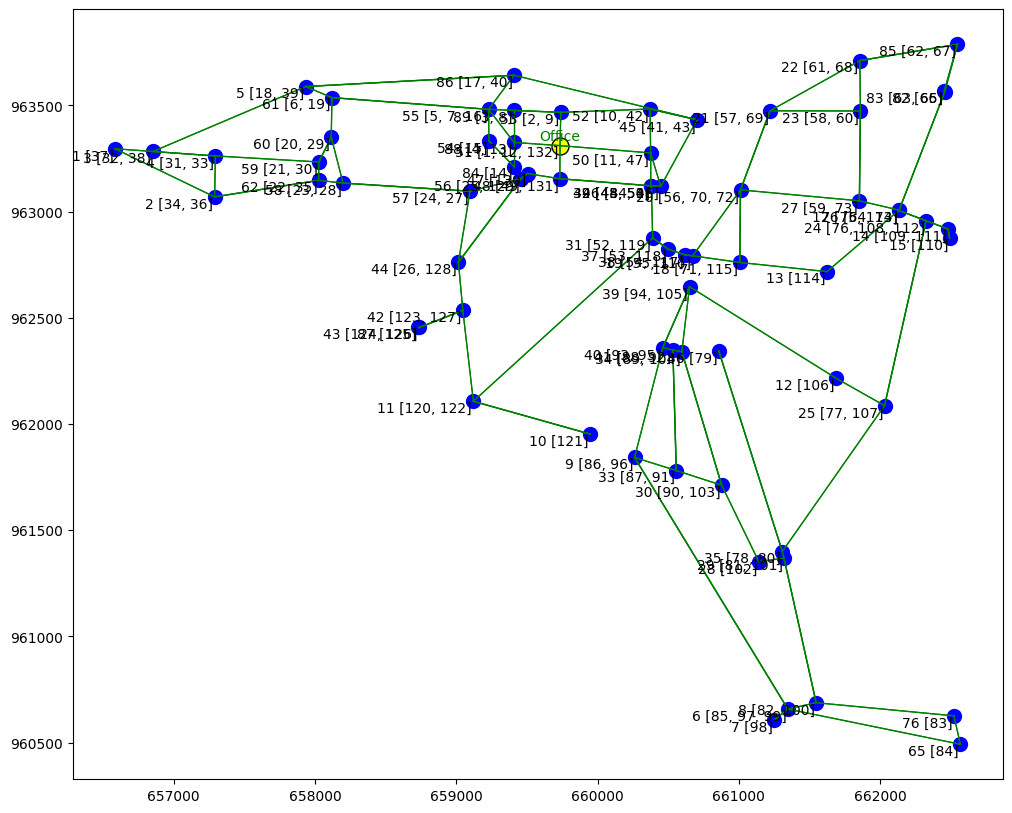

In [99]:
archivo_pes = 'PES.txt'
print(f"Graficando {archivo_pes}")
procesar_y_graficar_ruta_completa(archivo_pes,'antes',0)

Lectura del archivo NYT

Graficando NYT.txt
Ruta mínima (secuencia de nodos): [5, 6, 7, 8, 9, 16, 20, 11, 9, 10, 17, 10, 9, 11, 12, 18, 19, 18, 12, 13, 14, 15, 1, 2, 3, 4, 5]
5 -> 6: 211.61
6 -> 7: 187.38
7 -> 8: 187.95
8 -> 9: 185.42
9 -> 16: 480.84
16 -> 20: 426.41
20 -> 11: 386.59
11 -> 9: 275.14
9 -> 10: 182.21
10 -> 17: 473.07
17 -> 10: 473.07
10 -> 9: 182.21
9 -> 11: 275.14
11 -> 12: 236.54
12 -> 18: 362.02
18 -> 19: 309.65
19 -> 18: 309.65
18 -> 12: 362.02
12 -> 13: 213.41
13 -> 14: 351.43
14 -> 15: 281.11
15 -> 1: 322.33
1 -> 2: 261.20
2 -> 3: 230.23
3 -> 4: 248.65
4 -> 5: 207.04
Distancia total: 7622.34


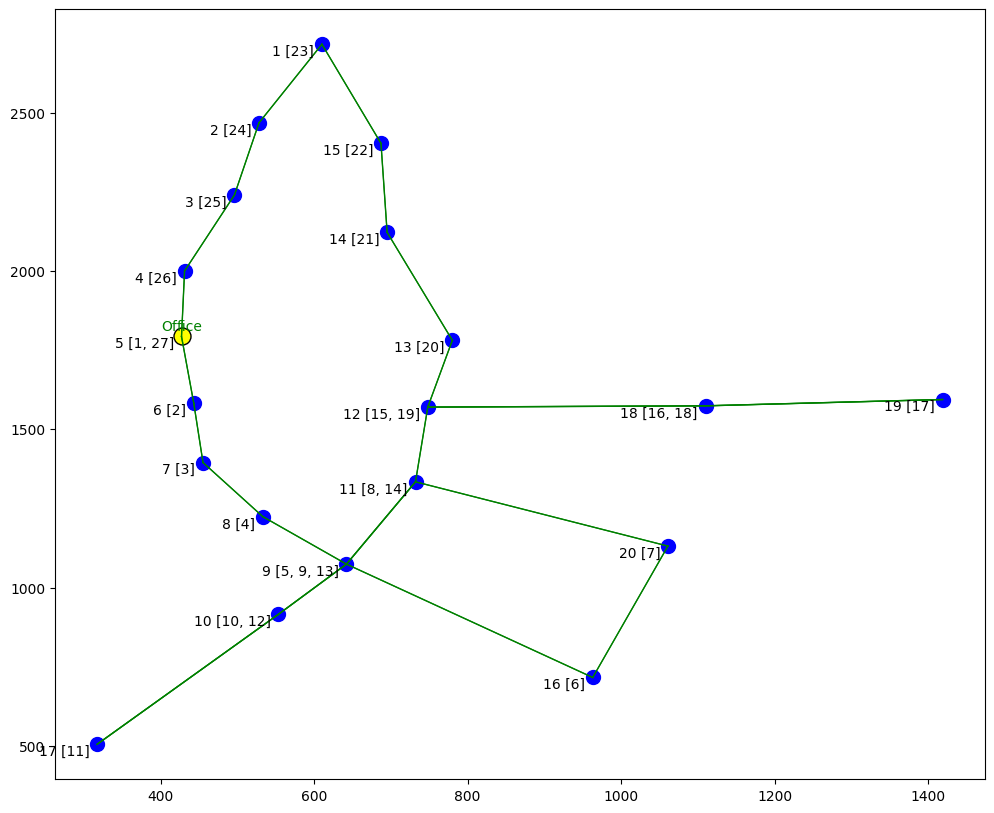

In [100]:
acrhivo_nyt = 'NYT.txt'
print(f"Graficando {acrhivo_nyt}")
procesar_y_graficar_ruta_completa(acrhivo_nyt,'antes',0)

Lectura del archivo HAN

Graficando HAN.txt
Ruta mínima (secuencia de nodos): [29, 30, 31, 32, 25, 26, 27, 16, 27, 26, 25, 24, 23, 20, 21, 22, 21, 20, 3, 19, 18, 17, 16, 15, 14, 10, 11, 12, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 20, 23, 28, 29]
29 -> 30: 1780.86
30 -> 31: 768.58
31 -> 32: 1085.81
32 -> 25: 1444.01
25 -> 26: 1097.00
26 -> 27: 856.07
27 -> 16: 1087.68
16 -> 27: 1087.68
27 -> 26: 856.07
26 -> 25: 1097.00
25 -> 24: 1053.29
24 -> 23: 1496.05
23 -> 20: 1609.32
20 -> 21: 1287.46
21 -> 22: 399.55
22 -> 21: 399.55
21 -> 20: 1287.46
20 -> 3: 1437.33
3 -> 19: 606.08
19 -> 18: 677.03
18 -> 17: 543.84
17 -> 16: 721.42
16 -> 15: 654.82
15 -> 14: 854.61
14 -> 10: 788.01
10 -> 11: 697.87
11 -> 12: 839.54
12 -> 13: 1683.19
13 -> 12: 1683.19
12 -> 11: 839.54
11 -> 10: 697.87
10 -> 9: 788.02
9 -> 8: 954.50
8 -> 7: 944.62
7 -> 6: 649.25
6 -> 5: 1230.40
5 -> 4: 998.89
4 -> 3: 849.02
3 -> 2: 1003.26
2 -> 1: 409.03
1 -> 2: 409.03
2 -> 3: 1003.26
3 -> 20: 1437.33
20 -> 23: 1609.32
23 -> 28: 1132.51
28 -> 29

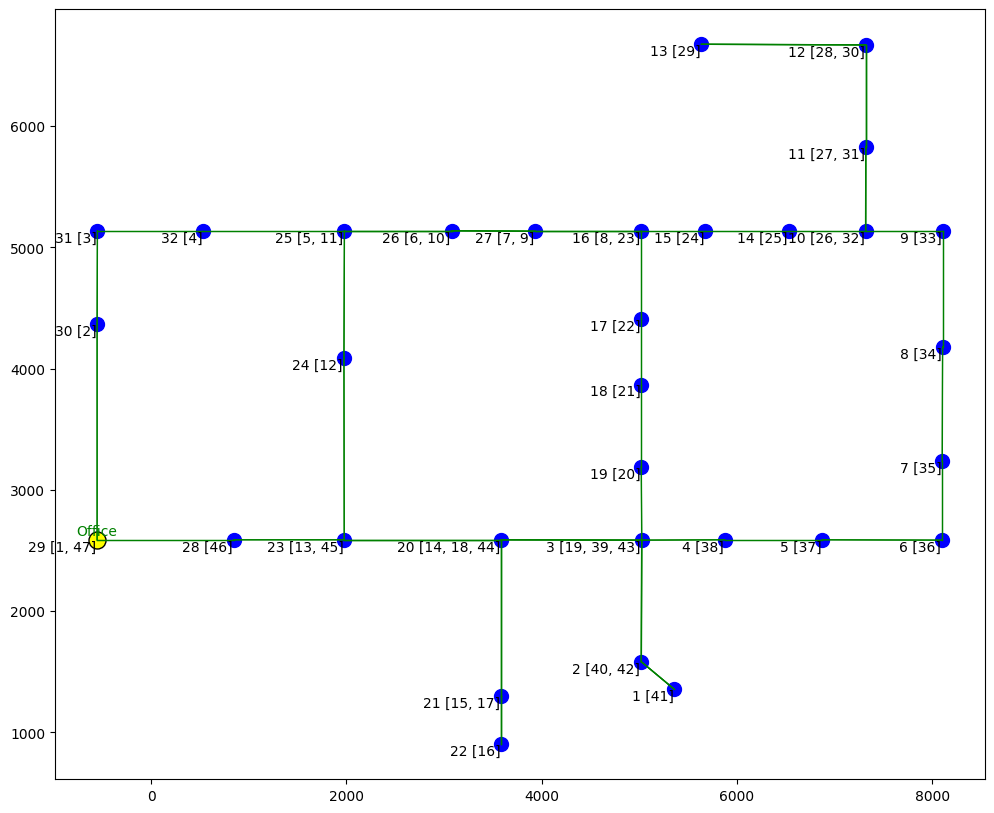

In [101]:
archivo_han = 'HAN.txt'
print(f"Graficando {archivo_han}")
procesar_y_graficar_ruta_completa(archivo_han,'antes',0)

Lectura del archivo FOS

Graficando FOS.txt
Ruta mínima (secuencia de nodos): [4, 12, 13, 5, 13, 14, 21, 22, 23, 25, 16, 29, 33, 32, 33, 34, 31, 34, 35, 30, 35, 36, 1, 37, 1, 36, 9, 30, 29, 28, 9, 28, 8, 25, 23, 24, 8, 24, 7, 22, 15, 20, 19, 20, 14, 21, 6, 7, 6, 5, 4, 12, 19, 11, 26, 27, 26, 15, 16, 27, 32, 10, 18, 17, 18, 2, 3, 11, 10, 31, 1, 17, 2, 3, 4]
4 -> 12: 365.17
12 -> 13: 1376.03
13 -> 5: 528.72
5 -> 13: 528.72
13 -> 14: 762.00
14 -> 21: 440.06
21 -> 22: 996.32
22 -> 23: 699.04
23 -> 25: 512.85
25 -> 16: 556.61
16 -> 29: 927.57
29 -> 33: 1458.96
33 -> 32: 974.65
32 -> 33: 974.65
33 -> 34: 240.62
34 -> 31: 413.68
31 -> 34: 413.68
34 -> 35: 1121.14
35 -> 30: 700.40
30 -> 35: 700.40
35 -> 36: 566.47
36 -> 1: 1428.56
1 -> 37: 612.00
37 -> 1: 612.00
1 -> 36: 1428.56
36 -> 9: 1253.32
9 -> 30: 841.50
30 -> 29: 385.07
29 -> 28: 996.04
28 -> 9: 1193.37
9 -> 28: 1193.37
28 -> 8: 983.08
8 -> 25: 980.02
25 -> 23: 512.85
23 -> 24: 1391.31
24 -> 8: 899.16
8 -> 24: 899.16
24 -> 7: 1363.56
7 -> 22: 2159.70
22 -> 15:

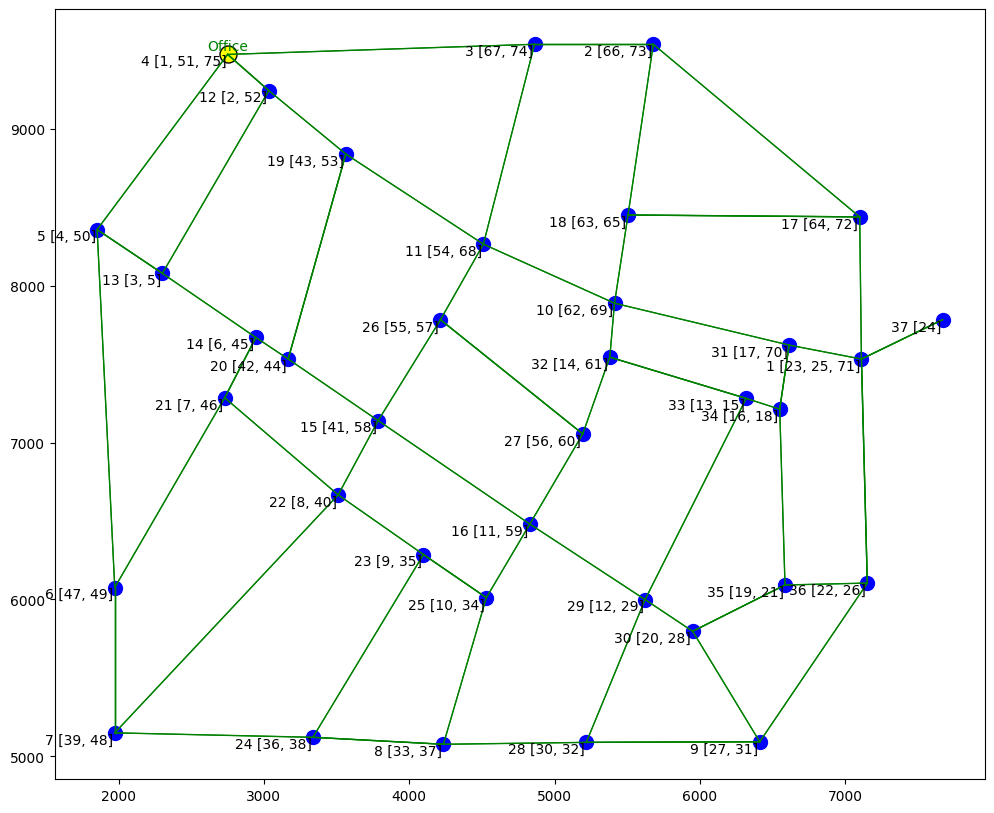

In [102]:
archivo_fos = 'FOS.txt'
print(f"Graficando {archivo_fos}")
procesar_y_graficar_ruta_completa(archivo_fos,'antes',0)

## 7. Expansión de la red

Leer el archivo

In [103]:
'''# Función para leer el archivo HAN.txt
def lectura_grafo(nombre_archivo):
    with open(nombre_archivo, "r") as archivo:
        lineas = archivo.readlines()

    nodos = {}
    aristas = {}
    nuevos_nodos = []
    oficina = None

    seccion_actual = None

    for linea in lineas:
        linea = linea.strip()
        if linea.startswith("["):  # Identificar secciones
            seccion_actual = linea
            continue

        if seccion_actual == "[NODES]":
            datos_nodo = linea.split()
            nodo_id = int(datos_nodo[0])
            x, y = map(float, datos_nodo[1:3])
            es_fuente = int(datos_nodo[3])  # 1 si es fuente, 0 si no
            nodos[nodo_id] = ((x, y), es_fuente)

        elif seccion_actual == "[EDGES]":
            datos_arista = linea.split()
            u, v = map(int, datos_arista[:2])
            longitud = float(datos_arista[2])  # Peso de la arista
            if u not in aristas:
                aristas[u] = []
            if v not in aristas:
                aristas[v] = []
            aristas[u].append((v, longitud))
            aristas[v].append((u, longitud))

        elif seccion_actual == "[OFFICE]":
            oficina = int(linea)

        elif seccion_actual == "[NEW]":
            datos_nuevo_nodo = linea.split()
            x, y, capacidad = map(float, datos_nuevo_nodo)
            nuevos_nodos.append((x, y, capacidad))

    nodos_cant = len(nodos)
    aristas_cant = sum(len(v) for v in aristas.values()) // 2

    return nodos_cant, aristas_cant, nodos, aristas, oficina, nuevos_nodos'''

'# Función para leer el archivo HAN.txt\ndef lectura_grafo(nombre_archivo):\n    with open(nombre_archivo, "r") as archivo:\n        lineas = archivo.readlines()\n\n    nodos = {}\n    aristas = {}\n    nuevos_nodos = []\n    oficina = None\n\n    seccion_actual = None\n\n    for linea in lineas:\n        linea = linea.strip()\n        if linea.startswith("["):  # Identificar secciones\n            seccion_actual = linea\n            continue\n\n        if seccion_actual == "[NODES]":\n            datos_nodo = linea.split()\n            nodo_id = int(datos_nodo[0])\n            x, y = map(float, datos_nodo[1:3])\n            es_fuente = int(datos_nodo[3])  # 1 si es fuente, 0 si no\n            nodos[nodo_id] = ((x, y), es_fuente)\n\n        elif seccion_actual == "[EDGES]":\n            datos_arista = linea.split()\n            u, v = map(int, datos_arista[:2])\n            longitud = float(datos_arista[2])  # Peso de la arista\n            if u not in aristas:\n                arista

Calcular la longitud de las tuberías

In [104]:
def graficar_grafo_con_longitud(nodos, aristas_con_longitud, oficina):
    plt.figure(figsize=(12, 10))

    # Dibujar nodos y sus etiquetas
    for nodo_id, (coord, es_fuente) in nodos.items():
        x, y = coord
        color = 'red' if es_fuente == 1 else 'black'
        plt.scatter(x, y, color='blue', s=100)
        plt.text(x-10, y, f'{nodo_id}', color=color, fontsize=10, ha='right', va='top')

    # Dibujar aristas con capacidad y longitud
    for nodo_id, vecinos in aristas_con_longitud.items():
        for vecino_id, capacidad, longitud in vecinos:
            x1, y1 = nodos[nodo_id][0]
            x2, y2 = nodos[vecino_id][0]

            # Dibujar la línea de la arista
            plt.plot([x1, x2], [y1, y2], color='green', linewidth=1.5)

            # Calcular posición media para mostrar capacidad y longitud
            x_mid = (x1 + x2) / 2
            y_mid = (y1 + y2) / 2
            plt.text(x_mid, y_mid + 130, f'{int(capacidad)}', color='black', fontsize=8)
            plt.text(x_mid, y_mid + 40,f'{longitud:.2f}', color='black', fontsize=8)

    # Marcar la oficina en un color diferente
    if oficina is not None:
        x, y = nodos[oficina][0]
        plt.scatter(x, y, color='yellow', s=120)
        plt.text(x-20, y, 'Office', color='green', fontsize=12, ha='right', va='top')

    plt.axis('on')
    plt.show()

Distancia_entre_nodos

In [105]:
def distancia_entre_nodos(nodos, nodo1, nodo2):
  x1, y1 = nodos[nodo1][0]
  x2, y2 = nodos[nodo2][0]
  return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

Agregar nuevos nodos

In [106]:
def agregar_nuevos_nodos(nodos_cant,aristas_cant,nodos, aristas, nuevos_nodos):
  for nuevo_nodo in nuevos_nodos:
    x, y, capacidad = nuevo_nodo
    #Se obtiene su id a base del último id existente en los nodos
    nuevo_id = max(nodos.keys()) + 1
    #Se agrega al diccionario, cómo no son nodo fuentes, tiene el valor de cero
    nodos[nuevo_id] = ((x, y), 0)
    #Se inicializa valores para encontrar el nodo más cercano al nodo nuevo
    distancia_minima = float('inf')
    #Se guardará el id del nodo vecino
    nodo_cercano = None
    for nodo_id, (coord, es_fuente) in nodos.items():
      if nuevo_id != nodo_id and es_fuente != 1:
        distancia = distancia_entre_nodos(nodos, nuevo_id, nodo_id)
        if distancia < distancia_minima:
          distancia_minima = distancia
          nodo_cercano = nodo_id
    aristas[nuevo_id] = [(nodo_cercano, capacidad)]
    aristas[nodo_cercano].append((nuevo_id, capacidad))
    nodos_cant += 1
    aristas_cant += 1

  return nodos_cant,aristas_cant,nodos, aristas


In [107]:
# Función para calcular la longitud de las tuberías y devolver el listado con longitud agregada
def calcular_longitud_tuberias(nodos, aristas):
    aristas_con_longitud = {}

    for nodo_id, vecinos in aristas.items():
        aristas_con_longitud[nodo_id] = []
        for vecino_id, capacidad in vecinos:
            x1, y1 = nodos[nodo_id][0]
            x2, y2 = nodos[vecino_id][0]
            # Calcular longitud usando distancia euclidiana
            longitud = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            # Agregar arista con longitud calculada
            aristas_con_longitud[nodo_id].append((vecino_id, capacidad, longitud))

    return aristas_con_longitud

In [108]:
def partes(nombre_archivo,version,opcion):
  graficar_grafo_desde_archivo(nombre_archivo,version,opcion)
  procesar_y_graficar_con_longitud(nombre_archivo,version,opcion)
  sectorizar_y_graficar(nombre_archivo,version,opcion)
  reportar_frescura_agua(nombre_archivo,version,opcion)
  calcular_y_reportar_flujo_maximo(nombre_archivo,version,opcion)

Función para analizar y actualizar la red

In [109]:
def analizar_y_actualizar_red(nombre_archivo,version,opcion):
    # Leer archivo y preparar datos del grafo
    nodos_cant, aristas_cant, nodos, aristas, oficina, nuevos_nodos = lectura_grafo(nombre_archivo)


    partes(nombre_archivo,version,opcion)
    # Construir el grafo con longitudes
    # Calcular longitudes de las tuberías
    #aristas_con_longitud = calcular_longitud_tuberias(nodos, aristas)

    # Graficar el grafo con capacidad y longitud de cada arista
    #graficar_grafo_con_longitud(nodos, aristas_con_longitud, oficina)
    """G = calcular_longitud_tuberias(nodos, aristas)
    # Mostrar datos iniciales
    print(f"Nodos del grafo: {list(G.nodes(data=True))}")
    print(f"Aristas del grafo: {list(G.edges(data=True))}")
    print(f"Oficina: Nodo {oficina}")
    print(f"Nuevos nodos propuestos: {nuevos_nodos}")
    nodos_cant,aristas_cant,nodos, aristas = agregar_nuevos_nodos(nodos_cant,aristas_cant,nodos, aristas, nuevos_nodos)


    # Calcular longitudes de las tuberías
    aristas_con_longitud = calcular_longitud_tuberias(nodos, aristas)

    # Graficar el grafo con capacidad y longitud de cada arista
    graficar_grafo_con_longitud(nodos, aristas_con_longitud, oficina)
     Construir el grafo con longitudes
    G = calcular_longitud_tuberias(nodos, aristas)
    # Mostrar datos finales
    print(f"Nodos del grafo: {list(G.nodes(data=True))}")
    print(f"Aristas del grafo: {list(G.edges(data=True))}")
    print(f"Oficina: Nodo {oficina}")"""

### Archivos

Lectura del archivo PES

Graficando PES.txt


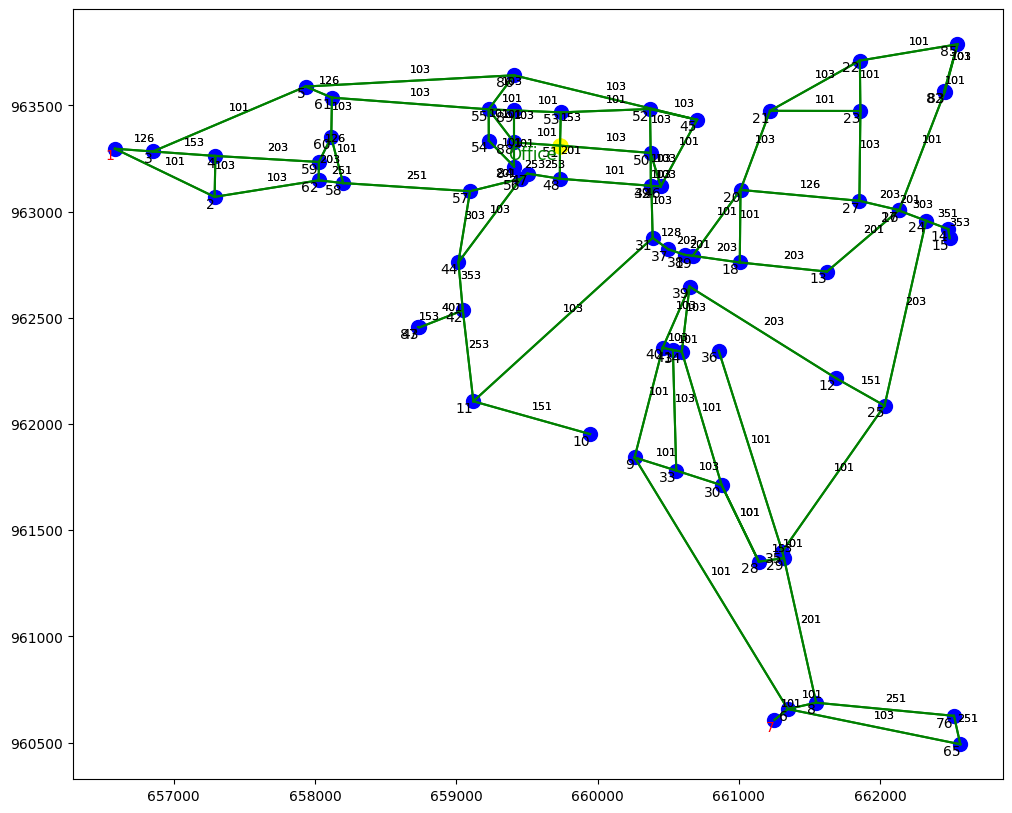

Lista de aristas PES.txt
Nodo 1 a 2: Longitud = 741.69
Nodo 2 a 1: Longitud = 741.69
Nodo 3 a 4: Longitud = 442.94
Nodo 4 a 3: Longitud = 442.94
Nodo 5 a 3: Longitud = 1123.65
Nodo 6 a 7: Longitud = 107.53
Nodo 7 a 6: Longitud = 107.53
Nodo 8 a 6: Longitud = 203.07
Nodo 9 a 6: Longitud = 1605.88
Nodo 10 a 11: Longitud = 841.26
Nodo 11 a 10: Longitud = 841.26
Nodo 15 a 14: Longitud = 44.03
Nodo 14 a 15: Longitud = 44.03
Nodo 13 a 17: Longitud = 583.89
Nodo 17 a 13: Longitud = 583.89
Nodo 18 a 13: Longitud = 618.5
Nodo 19 a 18: Longitud = 334.9
Nodo 20 a 18: Longitud = 341.67
Nodo 21 a 20: Longitud = 426.94
Nodo 22 a 23: Longitud = 237.28
Nodo 23 a 22: Longitud = 237.28
Nodo 24 a 25: Longitud = 918.87
Nodo 25 a 24: Longitud = 918.87
Nodo 26 a 17: Longitud = 3.57
Nodo 27 a 26: Longitud = 284.76
Nodo 28 a 29: Longitud = 178.9
Nodo 29 a 28: Longitud = 178.9
Nodo 30 a 28: Longitud = 445.63
Nodo 31 a 32: Longitud = 244.53
Nodo 32 a 31: Longitud = 244.53
Nodo 33 a 30: Longitud = 328.69
Nodo 34

TypeError: graficar_grafo_con_longitud() takes 3 positional arguments but 6 were given

In [110]:
archivo_pes = 'PES.txt'
print(f"Graficando {archivo_pes}")
analizar_y_actualizar_red(archivo_pes,'antes',1)

Lectura del archivo NYT

In [ ]:
acrhivo_nyt = 'NYT.txt'
print(f"Graficando {acrhivo_nyt}")
analizar_y_actualizar_red(acrhivo_nyt)

Lectura del archivo HAN

In [ ]:
archivo_han = 'HAN.txt'
print(f"Graficando {archivo_han}")
analizar_y_actualizar_red(archivo_han)

Lectura del archivo FOS

In [ ]:
archivo_fos = 'FOS.txt'
print(f"Graficando {archivo_fos}")
analizar_y_actualizar_red(archivo_fos)

## 8.  Salidas completas y gráficas

In [ ]:
def imprimirTodo():
  acrhivo_nyt = 'NYT.txt'
  print(f"Graficando {acrhivo_nyt}")
  graficar_grafo_desde_archivo(acrhivo_nyt,'antes',0)

In [ ]:
acrhivo_nyt = 'NYT.txt'
analizar_y_actualizar_red(acrhivo_nyt)